## Movie Review Sentiment Analysis - The Lion King (2019) Complete Model

## Agenda
    - Preprocessing Steps of Train, Test Data
    - Modelling
        - Unsupervised Algorithms        
        - Hyperparamter Tuning
        - Machine Learning Algorithms
        - Deep Learning
    - Analysis of Model Results (Performance Review)

#### Import Libraries

In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import time

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [396]:
# setting precision of 
np.set_printoptions(precision=4)

Data Extraction/ Web scrapping
------
#### NOTE: Time to execute below chunk = 25 min
#### Load from local file 'data_0.csv'

In [397]:
# start_time = time.time()

# headers = {
# 'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
# 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
# 'X-Requested-With': 'XMLHttpRequest',
# }

# url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'
# s = requests.Session() # A Requests session. Provides cookie persistence, connection-pooling, and configuration.

# data = pd.DataFrame()  #initializing empty dataframe, payload parameter values
# end = ''
# start = ''

# for i in list(range(1,301)):
#     payload = {
#     'direction': 'next',
#     'endCursor': end,
#     'startCursor': start,
#     }
#     r = s.get(url, headers=headers, params=payload) # GET Call. Sends a GET request. Returns :class:`Response` object.
#     data= data.append(r.json()['reviews'], ignore_index=True)   #append Review info to dataframe
#     end=r.json()['pageInfo']['endCursor']    # update 'start' key for new page
#     time.sleep(5)
# print('Web scrap completed in %s s' % (str(time.time()-start_time)))    

# Store to Data local to local file
# data.to_csv('data.csv', index=False)

In [398]:
data=pd.read_csv('data_0.csv')
data.head(2)

,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,timeFromCreation,updateDate,user
0,2019-08-18T14:14:07.734Z,NaN,Jesse S,True,False,False,False,STAR_4,"This movie is good. The original, animated ver...",4.0,27m ago,2019-08-18T14:14:07.734Z,{'userId': 'D91306B7-6A67-4117-B384-6A35AF00C1...
1,2019-08-18T14:03:41.247Z,NaN,Shae C,False,False,False,True,STAR_4,Followed the original story which I was skepti...,4.0,38m ago,2019-08-18T14:03:41.247Z,{'userId': 'ff222e0c-e396-4d62-9e6a-82529303cb...


Data Pre-processing and EDA
---------

In [399]:
data.shape

(3000, 13)

In [400]:
data.dtypes

createDate           object
displayImageUrl      object
displayName          object
hasProfanity           bool
hasSpoilers            bool
isSuperReviewer        bool
isVerified             bool
rating               object
review               object
score               float64
timeFromCreation     object
updateDate           object
user                 object
dtype: object

In [401]:
data.describe()

,score
count,3000.000000
mean,3.919667
std,1.316672
min,0.500000
25%,3.000000
50%,4.500000
75%,5.000000
max,5.000000


In [402]:
data.describe(exclude='float64')

,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,timeFromCreation,updateDate,user
count,3000,222,2861,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3000,222,2464,2,2,2,2,10,2995,43,3000,3000
top,2019-08-04T15:36:02.033Z,https://graph.facebook.com/v3.3/10000047937306...,Google,False,False,False,True,STAR_5,Everyone who catch this back then when it was ...,"Aug 05, 2019",2019-08-04T15:36:02.033Z,{'userId': '17B8383C-1BB9-4D0D-B524-F1A72924D0...
freq,1,1,14,2967,2998,2999,2165,1369,2,318,1,1


#### Target Variable Formatting

1. Convert *score* --> **sentiment**:\
    i. if score > 3, **sentiment** = 0 [POSITIVE Review]\
    ii. if score =< 3, **sentiment** = 1 [NEGATIVE Review]\


**NOTE**: our Target Level for prediction is Negative Review.

In [403]:
# Predic
data['sentiment'] = data['score'].apply(lambda x: 0 if x>3 else 1)
data.describe()

,score,sentiment
count,3000.000000,3000.000000
mean,3.919667,0.276667
std,1.316672,0.447425
min,0.500000,0.000000
25%,3.000000,0.000000
50%,4.500000,0.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [404]:
data.drop('score', axis=1,inplace=True)
data.head(2)

,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,timeFromCreation,updateDate,user,sentiment
0,2019-08-18T14:14:07.734Z,NaN,Jesse S,True,False,False,False,STAR_4,"This movie is good. The original, animated ver...",27m ago,2019-08-18T14:14:07.734Z,{'userId': 'D91306B7-6A67-4117-B384-6A35AF00C1...,0
1,2019-08-18T14:03:41.247Z,NaN,Shae C,False,False,False,True,STAR_4,Followed the original story which I was skepti...,38m ago,2019-08-18T14:03:41.247Z,{'userId': 'ff222e0c-e396-4d62-9e6a-82529303cb...,0


In [405]:
from datetime import datetime as dt

data['createDate'] = pd.to_datetime(data['createDate'], infer_datetime_format=True)
data['date'] = data['createDate'].dt.date  # Date of review
data['time'] = data['createDate'].dt.time  # Time of review
data['weekday'] = data['createDate'].dt.weekday  #weekday number : Monday=0, Sunday=6

In [406]:
data['weekday'].value_counts()

0    476
3    474
6    473
5    460
4    445
1    369
2    303
Name: weekday, dtype: int64

In [407]:
data.dtypes

createDate          datetime64[ns, UTC]
displayImageUrl                  object
displayName                      object
hasProfanity                       bool
hasSpoilers                        bool
isSuperReviewer                    bool
isVerified                         bool
rating                           object
review                           object
timeFromCreation                 object
updateDate                       object
user                             object
sentiment                         int64
date                             object
time                             object
weekday                           int64
dtype: object

In [408]:
data.describe(exclude='int64')

,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,timeFromCreation,updateDate,user,date,time
count,3000,222,2861,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3000,222,2464,2,2,2,2,10,2995,43,3000,3000,18,3000
top,2019-08-17 22:04:48.038000+00:00,https://graph.facebook.com/v3.3/10000047937306...,Google,False,False,False,True,STAR_5,Everyone who catch this back then when it was ...,"Aug 05, 2019",2019-08-04T15:36:02.033Z,{'userId': '17B8383C-1BB9-4D0D-B524-F1A72924D0...,2019-08-05,17:42:29.975000
freq,1,1,14,2967,2998,2999,2165,1369,2,318,1,1,318,1
first,2019-08-01 14:44:38.298000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-08-18 14:14:07.734000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [409]:
data.drop('createDate', axis=1,inplace=True)  #Drop original Datetime variable
data.dtypes

displayImageUrl     object
displayName         object
hasProfanity          bool
hasSpoilers           bool
isSuperReviewer       bool
isVerified            bool
rating              object
review              object
timeFromCreation    object
updateDate          object
user                object
sentiment            int64
date                object
time                object
weekday              int64
dtype: object

In [410]:
# Reviews begin on  1st August 2018, collected till 18th August 2018
x = data['date'].value_counts().sort_index().index.values
y = data['date'].value_counts().sort_index().values
print(pd.DataFrame({'Date':x,'Review Count': y}).head(),'\n')
print(pd.DataFrame({'Date':x,'Review Count': y}).tail(),)

         Date  Review Count
0  2019-08-01           152
1  2019-08-02           252
2  2019-08-03           258
3  2019-08-04           294
4  2019-08-05           318 

          Date  Review Count
13  2019-08-14           107
14  2019-08-15            93
15  2019-08-16            67
16  2019-08-17            88
17  2019-08-18            46


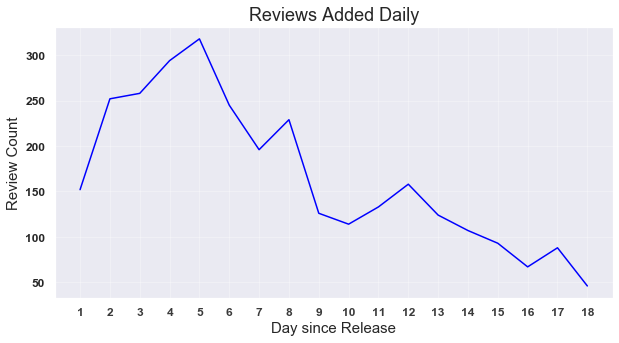

In [411]:
with sns.axes_style('white'):
    sns.set(rc={'figure.figsize':(10,5)})
    plt.plot(list(range(1,19)),y, color='blue')    
    plt.xlabel('Day since Release', fontsize=15)
    plt.ylabel('Review Count', fontsize=15)
    xtick_location = list(range(1,19))
    xtick_labels = list(range(1,19))
    plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
    plt.yticks(fontsize=12,)
    plt.title("Reviews Added Daily", fontsize=18)
    plt.grid(axis='both', alpha=.3)
    plt.show()
    
# Plot shows a Rise in Reviews during initial weeks, followed by a decline post Day 7

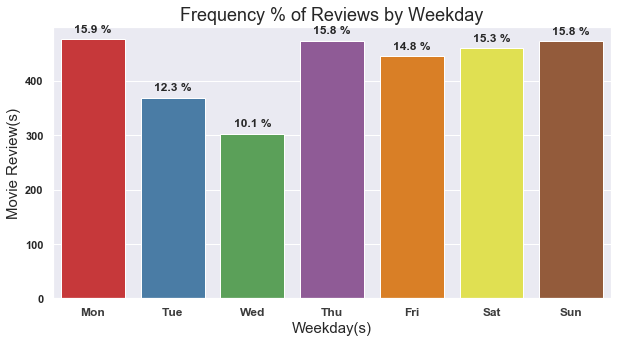

In [412]:
with sns.axes_style('white'):
    sns.set(rc={'figure.figsize':(10,5)})

    g = sns.countplot(x='weekday', data=data, palette='Set1', saturation=0.7)
    v_list = [str(round(i,1))+' %' for i in (data['weekday'].value_counts(normalize=True)*100).sort_index()]

    for v, p in zip(v_list, g.patches):   # Annotate the point 'xy' with Frequency%
            g.annotate(v, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',\
                       xytext = (0, 10), textcoords = 'offset points')
    xtick_location = list(range(0,7))
    xtick_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']    
    plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
    plt.xlabel('Weekday(s)',fontsize=15)
    plt.ylabel('Movie Review(s)',fontsize=15)
    plt.title('Frequency % of Reviews by Weekday', fontsize=18)
    plt.show()

# Shows a dip in reviews(viewership) on Tuesday and Wednesdays

In [413]:
# Trend of Positive and Negative Reviews grouped by Weekday(s)

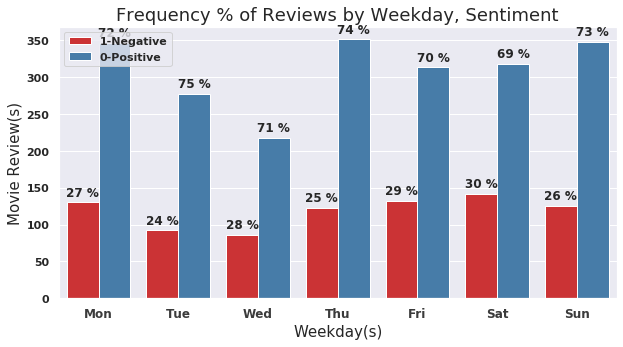

In [414]:
with sns.axes_style('white'):
    sns.set(rc={'figure.figsize':(10,5)})
    g = sns.countplot("weekday", data=data, hue='sentiment',hue_order=[1,0], palette='Set1')    
    v_list = [str(int(i))+' %' for i in data.groupby('weekday')['sentiment'].value_counts(normalize=True)*100]
    v_1 = [y for x,y in enumerate(v_list) if x%2==0] # Frequency% of Positive Review(s)
    v_2 = [y for x,y in enumerate(v_list) if x%2!=0]  # Frequency% of Negative Review(s)
    v_list = v_2+v_1
    for v, p in zip(v_list, g.patches):   # Annotate the point 'xy' with Frequency%
        g.annotate(v, (p.get_x() + p.get_width() / 2., 
                       p.get_height()), ha='center', va='center', xytext = (0, 10), textcoords = 'offset points')
    xtick_location = list(range(0,7))
    xtick_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.9)
    plt.xlabel('Weekday(s)',fontsize=15)
    plt.ylabel('Movie Review(s)',fontsize=15)
    plt.title('Frequency % of Reviews by Weekday, Sentiment', fontsize=18)
    g.legend(['1-Negative', '0-Positive'], loc=0)

#### Calendar Heat Map of Count of Negative Review(s) over 18 days of Available data

In [415]:
# Preparing Dateframe for Calendar Heat Map
neg_review=data[data['sentiment']>0].groupby('date')['sentiment'].value_counts()  # Count of Negative Reviews
data_cmap = pd.DataFrame(data={'neg_review':neg_review})
data_cmap.index = data_cmap.index.droplevel(1)  # Drop Second Index level
index=list(data_cmap.index.values)
index = [np.datetime64(i) for i in index]   # converting timestamp to np.datetime64()
data_cmap.index = index
data_cmap.head()  # Date indexed Dataframe

,neg_review
2019-08-01,37
2019-08-02,79
2019-08-03,85
2019-08-04,70
2019-08-05,87


<Figure size 1280x800 with 0 Axes>

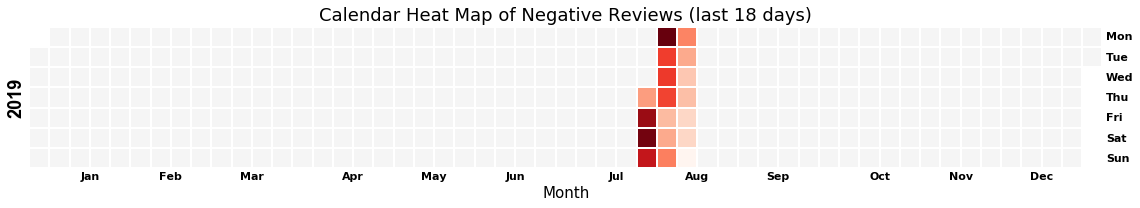

In [416]:
# !pip install calmap
import calmap
# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(data=data_cmap['2019']['neg_review'] ,fig_kws={'figsize': (16,10)},\
                    yearlabel_kws={'color':'black', 'fontsize':18})
plt.title('Calendar Heat Map of Negative Reviews (last 18 days)', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.show()

**NOTE:** The First 7 days had the largest contribution of Negative Reviews ()

In [417]:
data.dtypes.index

Index(['displayImageUrl', 'displayName', 'hasProfanity', 'hasSpoilers',
       'isSuperReviewer', 'isVerified', 'rating', 'review', 'timeFromCreation',
       'updateDate', 'user', 'sentiment', 'date', 'time', 'weekday'],
      dtype='object')

In [418]:
# Dropping 'date', 'time' info
data.drop(['displayImageUrl', 'displayName', 'hasProfanity', 'hasSpoilers','isSuperReviewer',
            'isVerified', 'rating','timeFromCreation','updateDate', 'user','date', 'time', 'weekday'], axis=1, inplace=True)
data.head()

,review,sentiment
0,"This movie is good. The original, animated ver...",0
1,Followed the original story which I was skepti...,0
2,"Unlike some other Disney remakes, this one is ...",1
3,Loved the movie!! The music was and is great!!...,0
4,It was a well made movie. I,0


In [419]:
print('Count of Review Sentiments:\n')
print(data['sentiment'].value_counts(),'\n')

print('Frequency % of Review Sentiments:\n')
print(data['sentiment'].value_counts(normalize=True)*100)   # <30% of All reviews are Negative

Count of Review Sentiments:

0    2170
1     830
Name: sentiment, dtype: int64 

Frequency % of Review Sentiments:

0    72.333333
1    27.666667
Name: sentiment, dtype: float64


Text Preprocessing
--------

In [420]:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

import re
import random
random.seed(123)

### LowerCase all text

In [421]:
data['review'] = [text.strip().lower() for text in data['review']]  # remove Trailing/Leading whitespaces
data['review'][:5]

0    this movie is good. the original, animated ver...
1    followed the original story which i was skepti...
2    unlike some other disney remakes, this one is ...
3    loved the movie!! the music was and is great!!...
4                          it was a well made movie. i
Name: review, dtype: object

#### Average Length of Review(s)

In [422]:
print('Average Review length of Train Data:', np.mean([len(i) for i in data['review']]))

Average Review length of Train Data: 146.767


### Removal/Replacement of: Contractions, Accented Characters, Symbols/Markdown Characters
**Contraction-Expansion Map:**

In [423]:
contraction_map = {
"ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have",
"couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
"hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have",
"he'll": "he will", "he'll've": "he will have", "he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is",
"I'd": "I would","I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would",
"i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would",
"it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not",
"might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not",
"mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is","should've": "should have","shouldn't": "should not",
"shouldn't've": "should not have","so've": "so have","so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is",
"there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have",
"they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not",
"we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not",
"what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have","when's": "when is",
"when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have",
"who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have",
"would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would",
"y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have",
"you'll": "you will","you'll've": "you will have","you're": "you are","you've": "you have"
}

In [424]:
import unicodedata  # for removal of accented characters

def expand_contractions(text, contraction_mapping=contraction_map):
    
    # Create 're' object by re.compile(pattern, repl, string)    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    # re.IGNORECASE : Make search case-insensiitive
    # re.DOTALL: Make the '.' special character match any character at all, including a newline
    
    # To Expand the Contracted Words
    def expand_match(contraction):
        match = contraction.group(0)        
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        return expanded_contraction
        
    # string substitution: regex.sub(replacement, subject)    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub(pattern="'", repl="", string=expanded_text)  # Remove apostrophe
    return expanded_text   # Returns expanded text


# Removes accented characters and emojis too
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii, non-Words and Digits/Numerals
    text = re.sub("(\\W|\\d)",' ',text)  # \W: non-alphanumeric character, \d: decimal digit
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)  # \n: newline char, \w: any alphanumeric character, 
                  # *: matches zero or more occurrences, ?: matches Zero or One occurrence of the pattern left to it.
                  # (a|b|c)xz: group sub-patterns to match, [abc]: set of characters to match, \s: whitespace 
                  # |: is used for alternation a|b
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    return text

In [425]:
# Test: expand_contractions()
txt = "They aren't sick, you shouldn't worry!"
print(expand_contractions(txt),'\n')

# Test: remove_accented_chars()
txt = 'Demain, dès l’aube, à l’heure où blanchit la campagne, Je partirai. J’irai par la forêt, j’irai par la montagne.'
print('Non-Accented Text:',remove_accented_chars(txt),'\n')

# Test: scrub_words()
txt = "Love, Love, \n\n\t, Love this movie!!😍😍😍❤️❤️❤️,&*(@)$&Lion King is the best#(@#$)"
print('Scrubbed Text:',scrub_words(txt))

They are not sick, you should not worry! 

Non-Accented Text: Demain, des laube, a lheure ou blanchit la campagne, Je partirai. Jirai par la foret, jirai par la montagne. 

Scrubbed Text: Love  Love       Love this movie                   Lion King is the best      


#### Invoking the above defined functions

In [426]:
# data['review']= [expand_contractions(re.sub('’', "'", text)) for text in data['review']]
data['review'] = data['review'].apply(lambda x: expand_contractions(re.sub('’', "'", x)))
# Apply remove_accented_chars()
data['review'] = data['review'].apply(lambda x: remove_accented_chars(re.sub('’', "'", x)))
# Apply scrub_words()
data['review'] = data['review'].apply(lambda x: scrub_words(re.sub('’', "'", x)))

### Adding new column "word_count" which specifies the number of tokens in each document

In [427]:
data['word_count'] = data['review'].apply(lambda x: len(x.split(' ')))  # tokenize words separated by single space

In [428]:
data.head()

,review,sentiment,word_count
0,this movie is good the original animated ver...,0,86
1,followed the original story which i was skepti...,0,12
2,unlike some other disney remakes this one is ...,1,70
3,loved the movie the music was and is great ...,0,20
4,it was a well made movie i,0,8


In [429]:
print('Train Data Review Stats:')
print('-'*20)
print(data['word_count'].describe(),'\n')

Train Data Review Stats:
--------------------
count    3000.000000
mean       31.346000
std        49.541105
min         2.000000
25%        10.000000
50%        18.000000
75%        34.000000
max       891.000000
Name: word_count, dtype: float64 



### Lemmatization, Stemming, Tokenization and Stopwords.

In [430]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('First ten stop words: %s' % list(stopwords)[:10])
# stopwords.remove('no')
# stopwords.remove('not')

First ten stop words: ['them', 'namely', '’ve', 'beforehand', "'ll", 'latterly', 'for', 'the', 'take', 'though']


In [431]:
print('Number of stop words: %d' % len(stopwords)) # stopwords is a set()

Number of stop words: 324


In [432]:
## Adding Custom stopwords to the spacy stopword list
for w in stopwords:
    nlp.vocab[w].is_stop = True

In [433]:
## Use NLTK for stemming.
## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# Return stems of words (w. & w/o stopwords)
def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word (word.text returns textual tokens)
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]        
    
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #print("returning stems")
    return stems

# Return lemmatized words (w. & w/o stopwords)
def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    # spaCy will convert word to lower case and changing past tense, 
    # gerund form (other tenses as well) to present tense. Also, “they” normalize to “-PRON-” which is pronoun.

    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
    
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)            
    
    lemma = [t.lemma_ for t in filtered_tokens]    
    return lemma

# Return Tokenized words only (w. and w/o stopwords)
def tokenize_only(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

We are trying to create four seperate lists:
1. Clean Review Lemmatized (w/o stopwords)
2. Clean Review Stemmed (w/o stop words)
3. Review Lemmatized (w stopwords)
4. Review Stemmed (w stopwords)

### NOTE: Time to execute below chunk = 780s (13 min)
#### Load from local file 'data_txt_preprocessed.csv'

#### Invoking above defined functions on **data**, **data_test**

In [ ]:
# ## Naming Conventions followed ####
# ## 'clean' describes Review that does not contain stopwords
# ## 'all' describes Review that contains stopwords.
# # Stemmed - Lemmatized - Tokenized

# st = time.time()  # start time

# # stemmed, lemmatized, tokenized reviews

# # w.o Stopwords    
# data['clean_review_lemmatized'] = data['review'].apply(lambda x: tokenize_and_lemmatize(nlp(x)))
# data['clean_review_stemmed'] = data['review'].apply(lambda x: tokenize_and_stem(nlp(x)))
# data['clean_review_tokenized'] = data['review'].apply(lambda x: tokenize_only(nlp(x)))

# # w. Stopwords
# data['review_lemmatized'] = data['review'].apply(lambda x: tokenize_and_lemmatize(nlp(x), False))
# data['review_stemmed'] = data['review'].apply(lambda x: tokenize_and_stem(nlp(x), False))
# data['review_tokenized'] = data['review'].apply(lambda x: tokenize_only(nlp(x), False))

# print('Execution Time:', time.time()-st)
# data.to_csv('data_txt_preprocessed.csv',index=True)

In [434]:
data = pd.read_csv('data_txt_preprocessed.csv')
data.drop('userId', axis=1, inplace=True)
import ast
# string literal evaluation --> data structure
data['clean_review_stemmed'] = data['clean_review_stemmed'].apply(lambda x: ast.literal_eval(x))
data['clean_review_lemmatized'] = data['clean_review_lemmatized'].apply(lambda x: ast.literal_eval(x))
data['clean_review_tokenized'] = data['clean_review_tokenized'].apply(lambda x: ast.literal_eval(x))
data['review_stemmed'] = data['review_stemmed'].apply(lambda x: ast.literal_eval(x))
data['review_lemmatized'] = data['review_lemmatized'].apply(lambda x: ast.literal_eval(x))
data['review_tokenized'] = data['review_tokenized'].apply(lambda x: ast.literal_eval(x))

In [435]:
# Vocab List w.o stopwords
clean_vocab_lemmatized = []
clean_vocab_stemmed = []
clean_vocab_tokenized = []

# Vocab List w stopwords
all_vocab_lemmatized = []
all_vocab_tokenized = []

for i,j,k in zip(data['clean_review_lemmatized'],data['clean_review_stemmed'], data['clean_review_tokenized']):
    clean_vocab_lemmatized.extend(i)
    clean_vocab_stemmed.extend(j)
    clean_vocab_tokenized.extend(k)
    
for i,j in zip(data['review_lemmatized'], data['review_tokenized']):
    all_vocab_lemmatized.extend(i)    
    all_vocab_tokenized.extend(j)


In [436]:
print('Vocabulary of Clean Lemmatized Reviews:',len(clean_vocab_lemmatized))
print('Vocabulary of Clean Stemmed Reviews:',len(clean_vocab_stemmed))
print('Vocabulary of Clean Tokenized Reviews:',len(clean_vocab_tokenized),'\n')
print('Vocabulary of Lemmatized Reviews:',len(all_vocab_lemmatized))
print('Vocabulary of Tokenized Reviews:',len(all_vocab_tokenized),'\n')
print('Total Unique Stopwords in Reviews', len(all_vocab_tokenized)-len(clean_vocab_tokenized))

Vocabulary of Clean Lemmatized Reviews: 35727
Vocabulary of Clean Stemmed Reviews: 35727
Vocabulary of Clean Tokenized Reviews: 35727 

Vocabulary of Lemmatized Reviews: 80818
Vocabulary of Tokenized Reviews: 80818 

Total Unique Stopwords in Reviews 45091


Text Data Visualization
----------

In [437]:
# Creating Dataframe for tokens in Review's Vocabulary
all_vocab_frame = pd.DataFrame({'words': all_vocab_tokenized}, index = all_vocab_lemmatized)
print ('There are ' + str(all_vocab_frame.shape[0]) + ' words in all_vocab_frame')

clean_vocab_frame = pd.DataFrame({'words': clean_vocab_tokenized}, index = clean_vocab_lemmatized)
print ('There are ' + str(clean_vocab_frame.shape[0]) + ' words in clean_vocab_frame')

There are 80818 words in all_vocab_frame
There are 35727 words in clean_vocab_frame


### Plotting Most frequent words before and after stopword removal

In [438]:
values, counts = np.unique(clean_vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

[2521 2726 1729 ... 1941 1926 4435]
[4158 2187 4530 ... 2076 2117 4692]


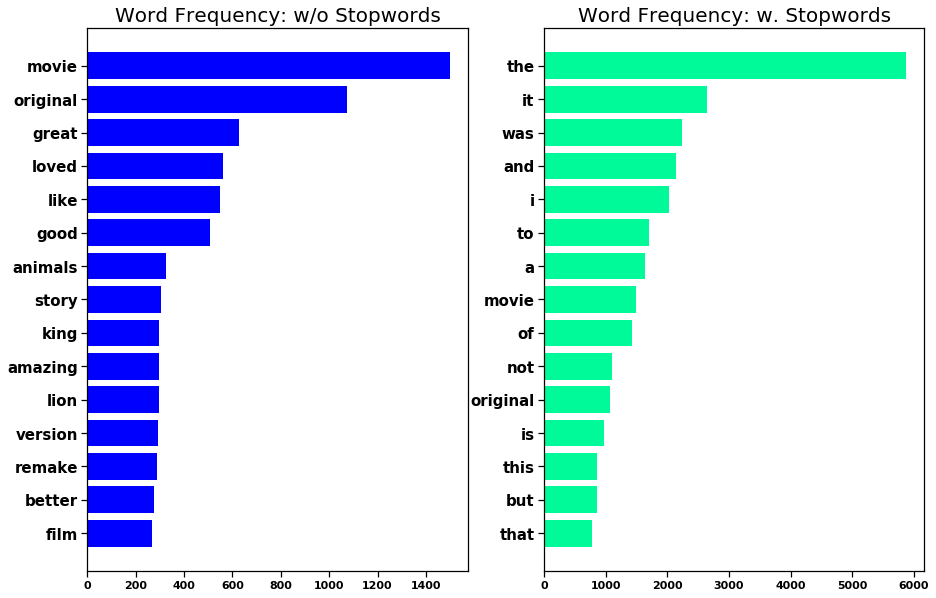

In [439]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)
plt.figure(figsize=(15,10))

# Frequency plot of words w/o stopwords
plt.subplot(1,2,1)
plt.barh(values[:15], counts[:15], color='blue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Word Frequency: w/o Stopwords', fontsize=20)


# Frequency plot of words with stopwords
plt.subplot(1,2,2)
plt.barh(all_values[:15], all_counts[:15], color='mediumspringgreen')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Word Frequency: w. Stopwords', fontsize=20)

plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different.\
2) Words in graph 1 (without stopwords) better describes the themes within the Reviews written

### Wordcloud of Review words (Lemmatized)

In [440]:
# Word Cloud string
clean_review_wordcloud=[]
for i in data['clean_review_lemmatized']:
    clean_review_wordcloud+=i
clean_string = " ".join(clean_review_wordcloud)

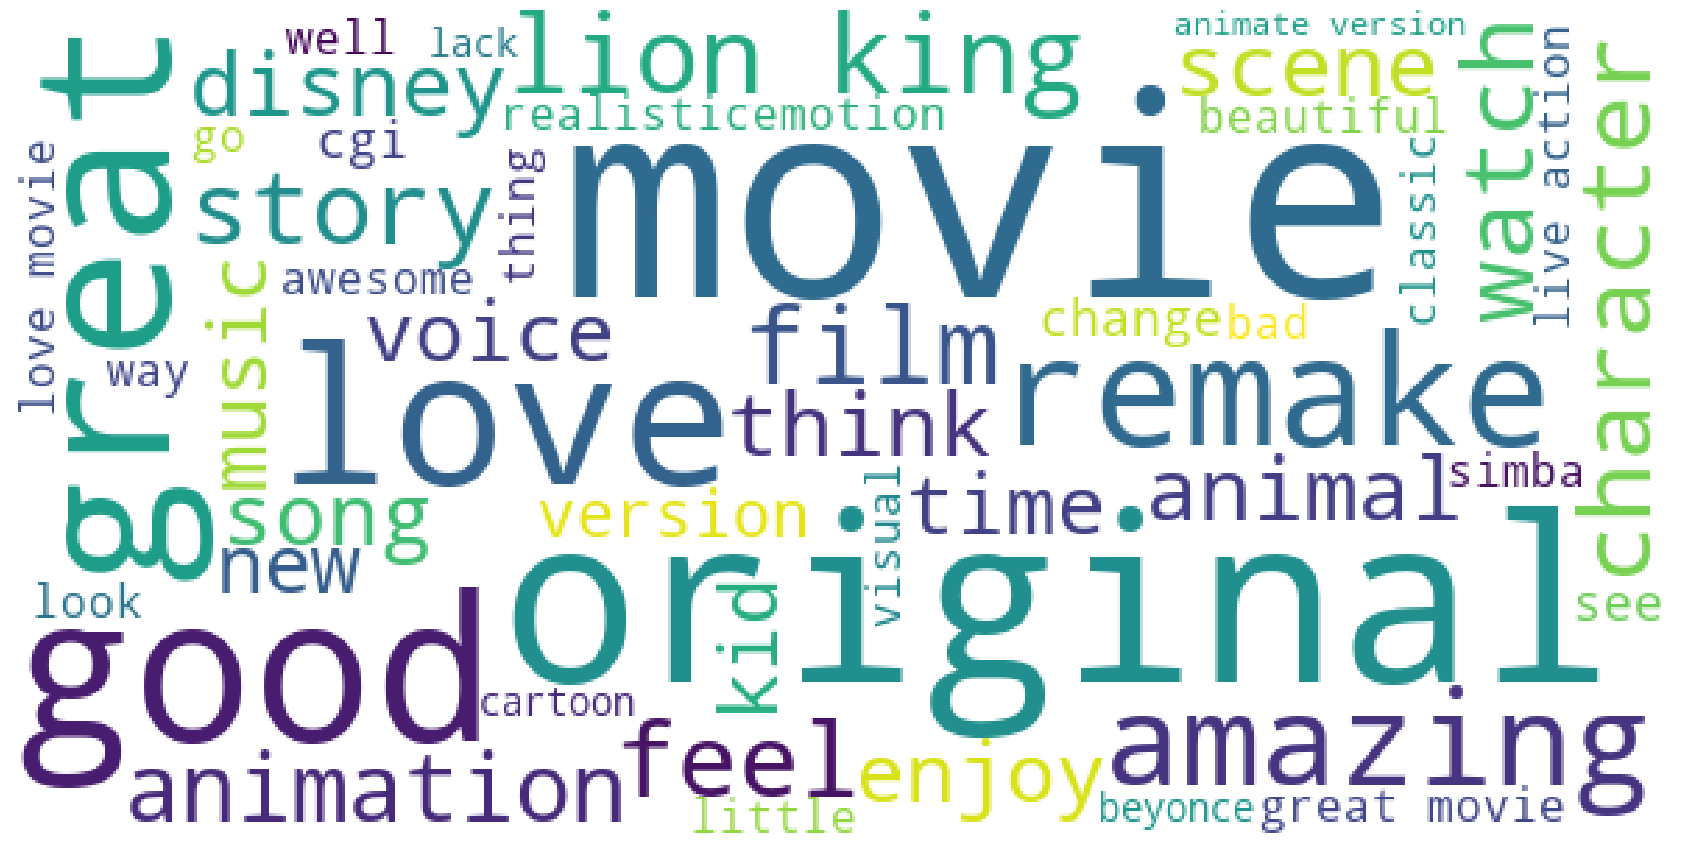

In [441]:
# !pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100, width = 600,height=300,max_words=50, background_color="white").generate(clean_string)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,50))
plt.imshow(wordcloud)
plt.axis(False)
plt.show()

### Word Frequency by Sentimentiment Groups

In [442]:
# grouby sentiment
grouped_text = data.groupby('sentiment')['clean_review_tokenized']

# Fetch entire tokenized text for specific group
from itertools import chain
frequent_words_sentiment_df = pd.DataFrame(columns={"values", "counts", "sentiment"})

for num in range(2):  # 2 Sentiment levels
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    # Create single List of Tokenized Reviews; lazily evaluates by taking a single iterable argument at a time
                               
    sorted_indices = np.argsort(-counts)  # returns indices of sorted 'counts' in reversed order    
    frequent_words_sentiment_df = frequent_words_sentiment_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "sentiment": num}, ignore_index=True)
    # Append word values in decreasing count order grouped by sentiment

frequent_words_sentiment_df.head()  # words sorted by counts order

,sentiment,counts,values
0,0,"[1029, 612, 541, 521, 345, 291, 250, 229, 227,...","[movie, original, loved, great, good, like, am..."
1,1,"[470, 462, 257, 161, 146, 137, 136, 134, 123, ...","[movie, original, like, good, better, film, vo..."


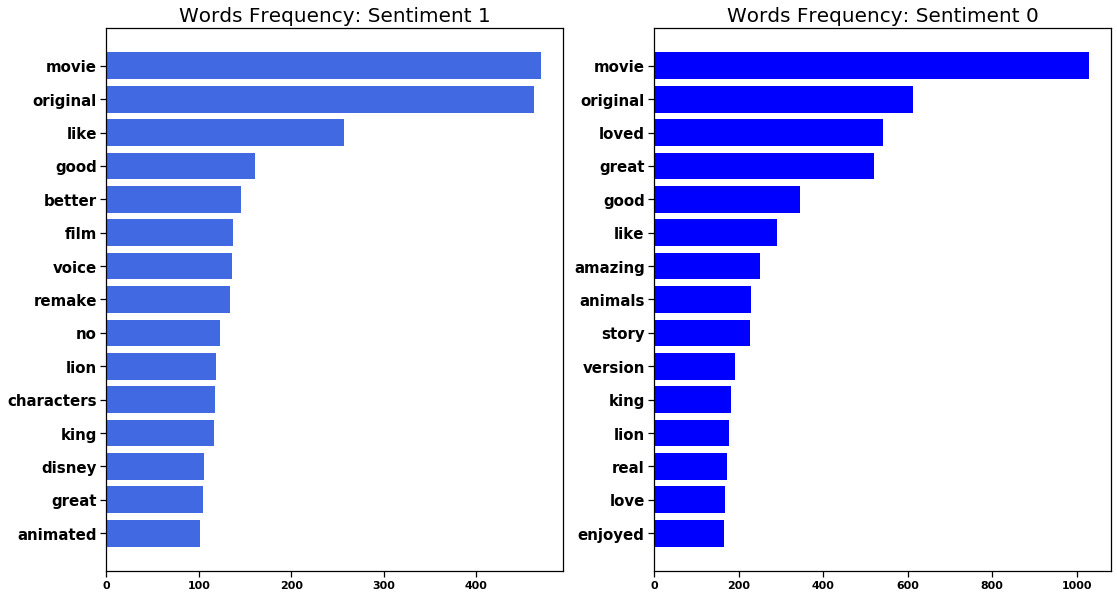

In [443]:
font = {'family' : ' DejaVu Sans', 'weight' : 'bold', 'size': 15}

plt.rc('font', **font)
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.barh(frequent_words_sentiment_df.loc[1,'values'][:15], frequent_words_sentiment_df.loc[1,'counts'][:15], color='royalblue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Sentiment 1', fontsize='20')

plt.subplot(1,2,2)
plt.barh(frequent_words_sentiment_df.loc[0,'values'][:15], frequent_words_sentiment_df.loc[0,'counts'][:15], color='blue')
plt.gca().invert_yaxis()
plt.title('Words Frequency: Sentiment 0', fontsize='20')
plt.yticks(fontsize=15)

plt.show()

#### Observations:
1. Generic words common to both Sentiment reviews cloud the differences between the classes (top words common to both: 'movie','original', 'like' etc.


2. Difference in count of occurences of key words:    

In [444]:
print('Count of "good" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='good')][0])
print('Count of "good" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='good')][0],'\n')
print('Count of "no" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='no')][0])
print('Count of "no" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='no')][0],'\n')
print('Count of "bad" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='bad')][0])
print('Count of "bad" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='bad')][0],'\n')
print('Count of "boring" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='boring')][0])
print('Count of "boring" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='boring')][0],'\n')
print('Count of "lacked" in Sentiment-1:',frequent_words_sentiment_df.loc[1,'counts'][np.where(frequent_words_sentiment_df.loc[1,'values']=='lacked')][0])
print('Count of "lacked" in Sentiment-0:',frequent_words_sentiment_df.loc[0,'counts'][np.where(frequent_words_sentiment_df.loc[0,'values']=='lacked')][0],'\n')

Count of "good" in Sentiment-1: 161
Count of "good" in Sentiment-0: 345 

Count of "no" in Sentiment-1: 123
Count of "no" in Sentiment-0: 51 

Count of "bad" in Sentiment-1: 55
Count of "bad" in Sentiment-0: 24 

Count of "boring" in Sentiment-1: 49
Count of "boring" in Sentiment-0: 7 

Count of "lacked" in Sentiment-1: 48
Count of "lacked" in Sentiment-0: 15 



### Word Frequency of Pure Negative, Pure Positive tokens of the Sentiment groups
- To better understand the divergence of the sentiments established between the two groups, we must remove the intersecting tokens present in both classes.

In [445]:
# Review Words in sentiment=1 not in sentiment=0
neg_tokens = list(set(frequent_words_sentiment_df.loc[1,'values'])-set(frequent_words_sentiment_df.loc[0,'values']))
# 1136 Pure Negative Words found

neg_index = np.array([list(frequent_words_sentiment_df.loc[1,'values']).index(i) for i in neg_tokens])  # index location
neg_counts = frequent_words_sentiment_df.loc[1,'counts'][neg_index] # counts of words
neg_tokens = np.array(neg_tokens)

# Sort Tokens by Descending Count order
index = np.argsort(-neg_counts)
neg_counts = neg_counts[index]
neg_tokens = neg_tokens[index]

# Review Words in sentiment=0 not in sentiment=1
pos_tokens = list(set(frequent_words_sentiment_df.loc[0,'values'])-set(frequent_words_sentiment_df.loc[1,'values']))
# 1136 Pure positive Words found

pos_index = np.array([list(frequent_words_sentiment_df.loc[0,'values']).index(i) for i in pos_tokens])  # index location
pos_counts = frequent_words_sentiment_df.loc[0,'counts'][pos_index] # counts of words
pos_tokens = np.array(pos_tokens)

# Sort Tokens by Descending Count order
index = np.argsort(-pos_counts)
pos_counts = pos_counts[index]
pos_tokens = pos_tokens[index]

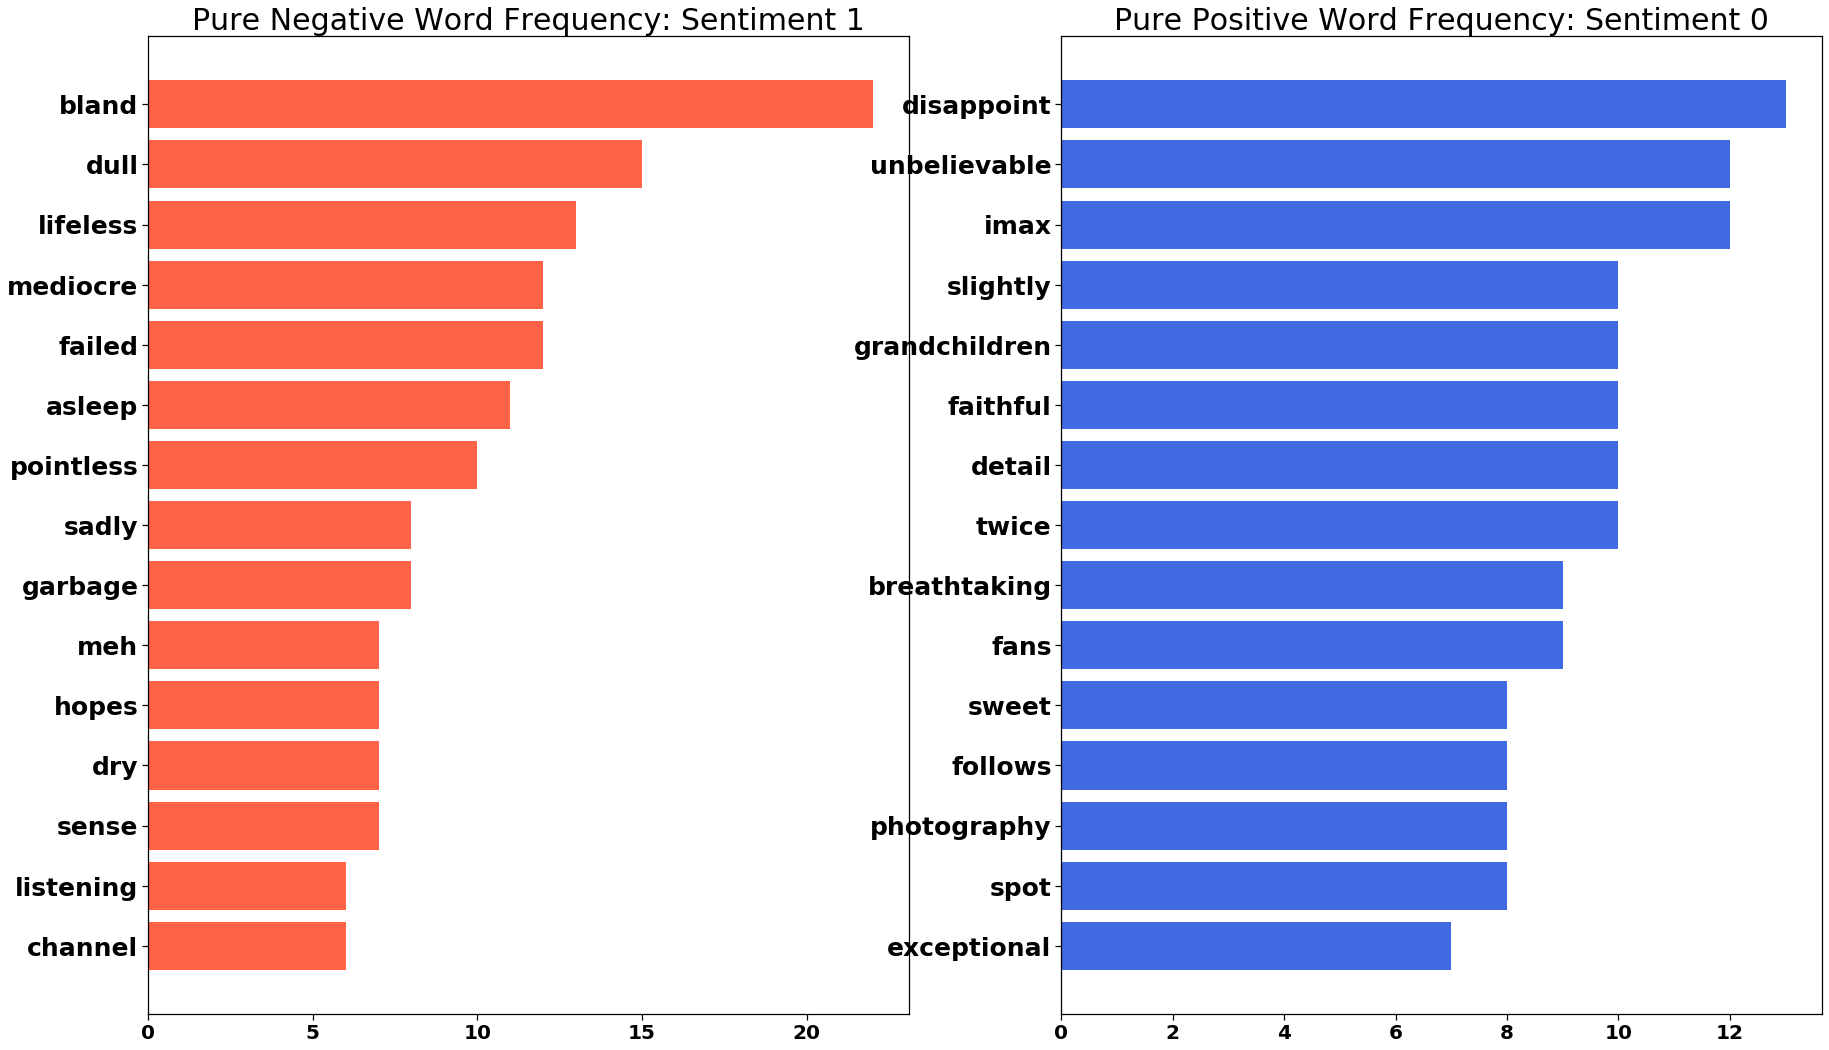

In [446]:
font = {'family' : ' DejaVu Sans', 'weight' : 'bold'}

plt.rc('font', **font)
plt.figure(figsize=(30,18))

plt.subplot(1,2,1)
plt.barh(neg_tokens[:15], neg_counts[:15], color='tomato')
plt.gca().invert_yaxis()
plt.yticks(fontsize=25)
plt.xticks(fontsize=20)
plt.title('Pure Negative Word Frequency: Sentiment 1', fontsize='30')

plt.subplot(1,2,2)
plt.barh(pos_tokens[:15], pos_counts[:15], color='royalblue')
plt.gca().invert_yaxis()
plt.yticks(fontsize=25)
plt.xticks(fontsize=20)
plt.title('Pure Positive Word Frequency: Sentiment 0', fontsize='30')

plt.show()

#### Observations:
1. Note the Top Words, Nouns and adjacectives in the classes <u>correlate</u> to the **Negative and Positive sentiments** expressed by the reviewers.

## Unsupervised Learning (K-means Clustiering, SVD-Latent Semantic Analysis

TF-IDF Explaination:
- TF: Term Frequency, which measures how frequently a term occurs in a document. The term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

- IDF: Inverse Document Frequency, which measures how important a term is.Frequent Terms are weighed down, while Rare Terms are scaled up, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

In [447]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string
data['clean_review_stemmed'] = [' '.join(text) for text in data['clean_review_stemmed']]
data['clean_review_lemmatized'] = [' '.join(text) for text in data['clean_review_lemmatized']]

In [448]:
data['clean_review_lemmatized'][0]

'movie good original animate version place heart like update version screw critic like movie shot shot movie difference anybody tired movie look good low rating care diferent opinion mean valid'

In [449]:
### Creating the `tfidf_matrix`
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters

# max_df : cutoff to exclude highly populated words in all doc eg: stopwords
# min_df : cutoff to exclude highly rare words in all doc eg: rarewords, no semantic value across corpus
# ngram_range : type of ngrams to include (min_ngram, max_ngram) (default=(1, 1))
# max_features : features dimension cutoff
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=1500,  #(0.05, 0.001)
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,1))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_review_lemmatized'])

print(tfidf_matrix.shape)

(3000, 3)


In [450]:
# Terms: Main latent themes of the Text
# vocabulary_: Main latent Features of the Text
# tfidf_vectorizer.vocabulary_

terms = tfidf_vectorizer.get_feature_names()
terms

['love', 'movie', 'original']

### 1. K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [451]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist    #cluster distance
import joblib
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=123)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

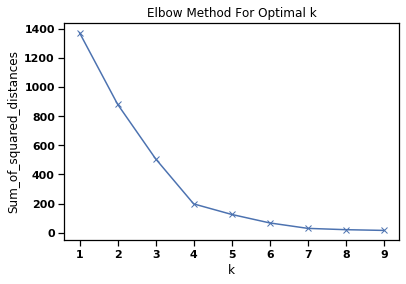

In [452]:
# Plot the elbow

# Distortion, on the y-axis, corresponds to our cost function: 
# the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

# As K increases the corresponding distortion value will tend to zero, 
# because you end up having just one data point per cluster. With only one data point in per cluster, 
# the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [453]:
# Based on Elbow cure, we choose 4 clusters
num_clusters = 3

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
#km.labels_
clusters = km.labels_.tolist()
#km.cluster_centers
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

the cluster centers are [[0.1165 0.2165 0.8771]
 [0.1854 0.9052 0.0415]
 [0.239  0.0061 0.0057]]


### Getting the top words from each cluster

In [454]:
# Sort Index of original list
km.cluster_centers_.argsort()

array([[0, 1, 2],
       [2, 0, 1],
       [2, 1, 0]], dtype=int64)

In [455]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[2, 1, 0],
       [1, 0, 2],
       [0, 1, 2]], dtype=int64)

In [456]:
print("Top terms per cluster:")

#sort cluster centers by proximity to centroid and picking the top 6 words per cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1] # Reverse the ndarray column order, returns same 'n' col array
for i in range(num_clusters):
    print()
    print("Top words in Cluster-%d :" % i, end='')
    print()
    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:

Top words in Cluster-0 :
['original'],['movie'],['love'],
Top words in Cluster-1 :
['movie'],['love'],['original'],
Top words in Cluster-2 :
['love'],['movie'],['original'],

In [457]:
data['cluster_group'] = clusters
# data.pop('clean_text', None)
data.head()

,review,sentiment,word_count,clean_review_stemmed,clean_review_lemmatized,clean_review_tokenized,review_lemmatized,review_stemmed,review_tokenized,cluster_group
0,this movie is good the original animated ver...,0,86,movi good origin anim version place heart like...,movie good original animate version place hear...,"[movie, good, original, animated, version, pla...","[this, movie, be, good, the, original, animate...","[this, movi, is, good, the, origin, anim, vers...","[this, movie, is, good, the, original, animate...",1
1,followed the original story which i was skepti...,0,12,follow origin stori skeptic enjoy,follow original story skeptical enjoy,"[followed, original, story, skeptical, enjoyed]","[follow, the, original, story, which, i, be, s...","[follow, the, origin, stori, which, i, was, sk...","[followed, the, original, story, which, i, was...",0
2,unlike some other disney remakes this one is ...,1,70,unlik disney remak pretti exact origin moment ...,unlike disney remake pretty exact original mom...,"[unlike, disney, remakes, pretty, exact, origi...","[unlike, some, other, disney, remake, this, on...","[unlik, some, other, disney, remak, this, one,...","[unlike, some, other, disney, remakes, this, o...",0
3,loved the movie the music was and is great ...,0,20,love movi music great like live action,love movie music great like live action,"[loved, movie, music, great, liked, live, action]","[love, the, movie, the, music, be, and, be, gr...","[love, the, movi, the, music, was, and, is, gr...","[loved, the, movie, the, music, was, and, is, ...",1
4,it was a well made movie i,0,8,movi,movie,[movie],"[-PRON-, be, a, well, make, movie, i]","[it, was, a, well, made, movi, i]","[it, was, a, well, made, movie, i]",1


In [458]:
cluster_df = pd.DataFrame(data)

In [459]:
cluster_df['cluster_group'].value_counts()

2    1368
1     874
0     758
Name: cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [460]:
cluster_df.groupby('sentiment')['cluster_group'].value_counts(normalize=True)*100

sentiment  cluster_group
0          2                48.018433
           1                30.691244
           0                21.290323
1          2                39.277108
           0                35.662651
           1                25.060241
Name: cluster_group, dtype: float64

In [461]:
##Step 1
cluster_df['clean_review_tokenized'] = [text.split(' ') for text in cluster_df['clean_review_lemmatized']]

In [462]:
##Step 2: Create pandas SeriesGroupBy object
## Fetch entire tokenized text for specific group
grouped_text = cluster_df.groupby('cluster_group')['clean_review_tokenized']

In [463]:
from itertools import chain

In [464]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [465]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    # eg: returns an 1D array of unique words from tokenized reviews
    # chain() constructor taking a single iterable argument that evaluates lazily;
    
    sorted_indices = np.argsort(-counts)  # returns indices of sorted list in reversed order
    # Create Cluster df of values(word list) sorted by counts 
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [466]:
frequent_words_df.head()  # words sorted by counts order

,counts,values,cluster_id
0,"[967, 330, 263, 220, 163, 160, 143, 134, 134, ...","[original, movie, like, good, film, remake, lo...",0
1,"[1217, 268, 240, 214, 208, 116, 115, 112, 107,...","[movie, great, love, good, like, watch, animal...",1
2,"[398, 232, 218, 181, 147, 136, 130, 104, 100, ...","[love, great, like, good, animal, story, amazi...",2


In [467]:
### Plotting Top Words in Clusters 0, 1, 2, 3

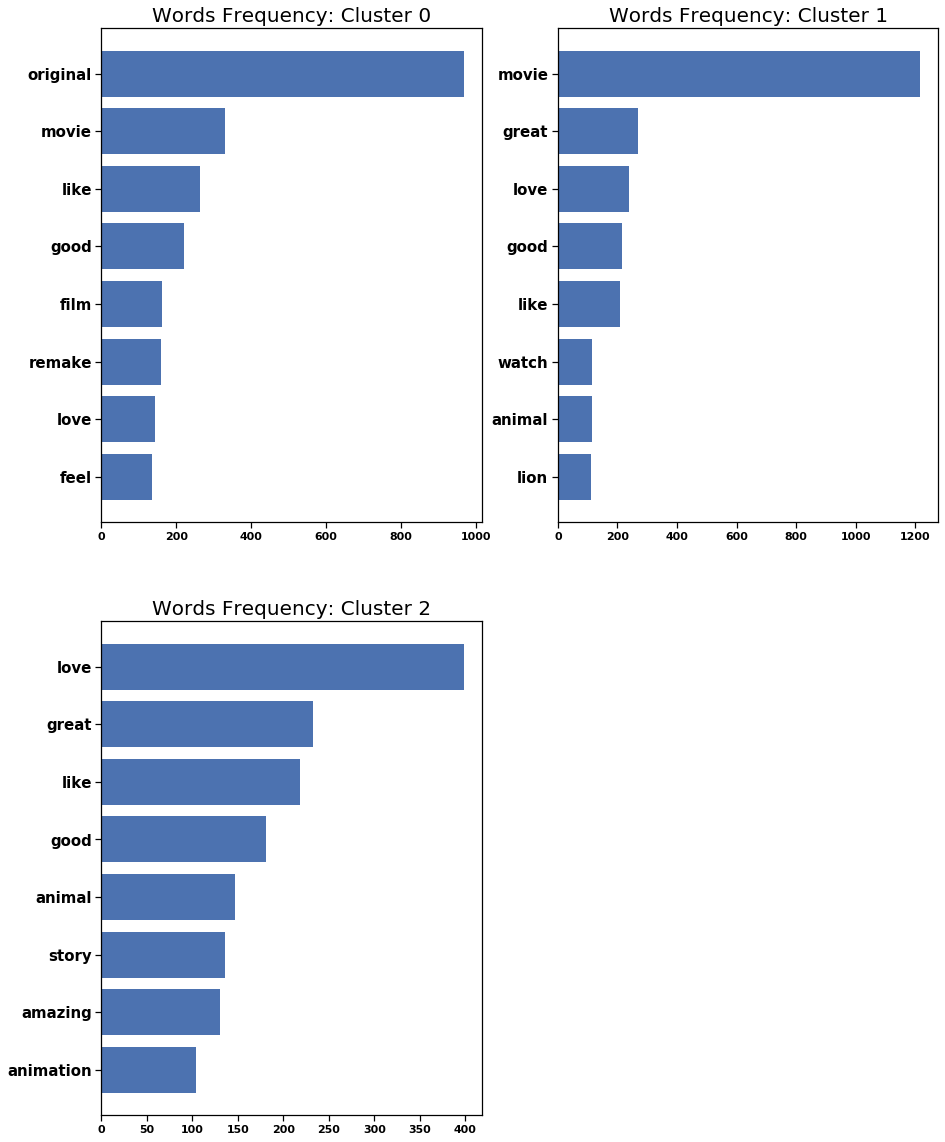

In [468]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

fig = plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:8], frequent_words_df.loc[0,'counts'][:8])
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Cluster 0', fontsize=20)

plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:8], frequent_words_df.loc[1,'counts'][:8])
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Cluster 1', fontsize=20)

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:8], frequent_words_df.loc[2,'counts'][:8])
plt.gca().invert_yaxis()
plt.yticks(fontsize=15)
plt.title('Words Frequency: Cluster 2', fontsize=20)

plt.show()

#### Observations:
Words/Themes populated in the Clusters' Reviews describe:

Cluster 0: General comments on Movie, consisting of potentially shorter reviews

Cluster 1: Describes 'love' for the movie, positive adjectives like 'great', 'like' etc

Cluster 2: Talks about originality of the movie/remake of the 2019 Lion King version

###   2. Truncated SVD (Latent Semantic Analysis - LSA) using Scikitlearn
Topic Modelling by Matrix Decomposition\
Upon Truncated SVD processing, we obtain 2 Matrices

1. U ∈ ℝ^(m ⨉ t) emerges as our Document-specific Topic allocation matrix  : m-document vector, t-topic
2. V ∈ ℝ^(n ⨉ t) becomes our Topic-specific Term allocation matrix  : n-term vector, t-topic

<u>In both U and V, the columns correspond to one of our t topics. </u>

In [469]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.99, max_features=1500,  #(0.05, 0.001)
                                 min_df=0.1,
                                 use_idf=True, ngram_range=(1,1))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_review_lemmatized'])

print(tfidf_matrix.shape)

(3000, 7)


In [470]:
# Importing tfidf vectorized documents
print(tfidf_matrix.shape)
tfidf_matrix.todense()

(3000, 7)


matrix([[0.    , 0.4907, 0.    , ..., 0.    , 0.6957, 0.2025],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 1.    ],
        [0.465 , 0.    , 0.    , ..., 0.    , 0.2785, 0.3243],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.3981, 0.    , 0.    , ..., 0.3043, 0.    , 0.5553],
        [0.    , 0.    , 0.    , ..., 1.    , 0.    , 0.    ]])

### Creating the `svd_matrix` from the `tfidf_matrix`

In [471]:
# Select No. of Latent Themes to extract from text
from sklearn.decomposition import TruncatedSVD

n_components = 2
svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=20,
             random_state=143, tol=0.0)

In [472]:
# explained_variance_ratio_
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"Total Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")

# singular_values_  : explains the Top 2 Latent Topics found in Text
print(f"The singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.1143 0.1987]
Total Explained Variance : 31.3 %
The singular values are [27.3874 19.38  ]


i.e
C-1 explains 30% of variation\
C-2 explains 38% of variation

### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [473]:
# Components describe the Theme of Text (represented by Singular Values, Singular Vectors)
# Theme = 2, 
svd_model.components_

array([[ 0.1138,  0.2421,  0.2732,  0.2369,  0.3411,  0.6993,  0.4384],
       [ 0.0122,  0.2171, -0.1694,  0.2124, -0.4014, -0.3661,  0.764 ]])

In [474]:
# Term vs Topic Strength
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")  # Expl
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.1138 0.2421 0.2732 0.2369 0.3411 0.6993 0.4384] and shape is (7,)
Topic 0: 
original -- 0.27323120726597955
movie -- 0.24211969805614475
love -- 0.11379863873052284
 
The component is [ 0.0122  0.2171 -0.1694  0.2124 -0.4014 -0.3661  0.764 ] and shape is (7,)
Topic 1: 
movie -- 0.217110224469735
love -- 0.012189052670109734
original -- -0.16937227329417848
 


### Tagging each document with a topic
### Creating the `doc_topic_matrix`
`doc_topic_matrix` is the resultant SVD Output

In [475]:
# 2 Singular Values, 2 Components (Eigenvalues, Eigenvectors - Strength of Variation)
# Documents - 3000, Topic - 2
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print(doc_topic_matrix,'\n')

svd_categories = np.argmax(doc_topic_matrix, axis=1)  # Returns the indices of the maximum values along an axis.
print(doc_topic_matrix.shape,'\n')
print(svd_categories)

[[ 0.8087  0.1093]
 [ 0.4384  0.764 ]
 [ 0.5736  0.3161]
 ...
 [ 0.      0.    ]
 [ 0.5498  0.4479]
 [ 0.3411 -0.4014]] 

(3000, 2) 

[0 1 0 ... 0 0 0]


In [476]:
data['SVD_group'] = svd_categories

In [477]:
print(data.groupby('sentiment')['SVD_group'].value_counts(normalize=True))

sentiment  SVD_group
0          0            0.907834
           1            0.092166
1          0            0.808434
           1            0.191566
Name: SVD_group, dtype: float64


# ---------------------
## Machine Learning Algorithms

In [479]:
## Combine all the tokens back to form a string
data['clean_review_tokenized'] = [' '.join(text) for text in data['clean_review_tokenized']]

In [481]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sent_list = data['clean_review_lemmatized']
neg_score=[]
pos_score=[]
neu_score=[]
compd_score=[]
# stop_words = set(stopwords.words('english'))

sid = SentimentIntensityAnalyzer()
for sent in sent_list:
    ss = sid.polarity_scores(sent)
    neg_score.append(ss['neg'])
    pos_score.append(ss['pos'])
    neu_score.append(ss['neu'])
    compd_score.append(ss['compound'])

# Train Data
data['neg_score'] = neg_score
data['pos_score'] = pos_score
data['neu_score'] = neu_score
data['compd_score'] = compd_score

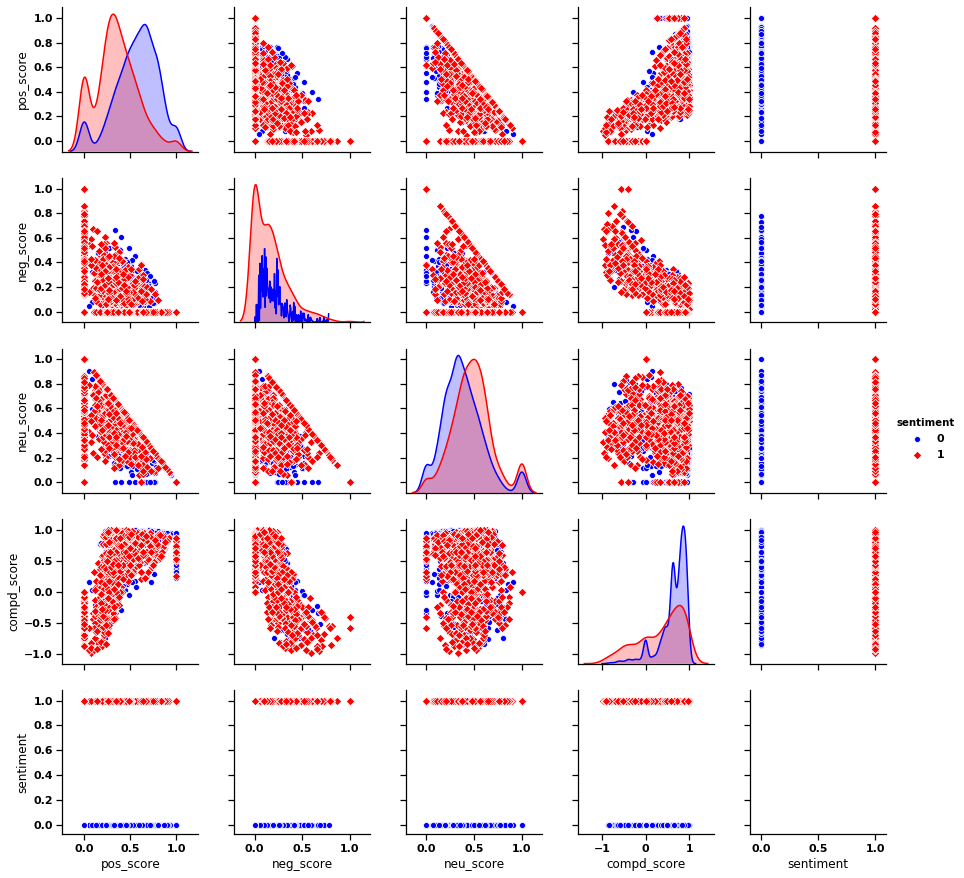

In [482]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
# plt.title('Scatter Plot Matrix of Numerical Features', fontsize=20)
sns.pairplot(data[['pos_score','neg_score','neu_score','compd_score','sentiment']],kind="scatter",hue='sentiment',
             markers=["o","D"],palette=('blue','red'),)
plt.rc('font', **font)
plt.show()

#### Observations:
1. 'pos_score', 'compd_score' are positively correlated. Also, distribution of scores by Sentiment group(s) is well-separated at the respective Central Tendency positions. We create new feature: **pos_comp_score** = **pos_score** + **compd_score**\
Note: 'compd_score' and 'neg_score' is negatively correlated.

2. 'neg_score' distribution by Sentiment group(s) is well-separated at the respective Central Tendency positions.

3. 'neu_score' has an almost uniform (overlapping) distribution in both Sentiment group(s), is dropped.

4. 'compd_score' is dropped after feature engineering.

In [483]:
# Train
data['pos_comp_score']=data['pos_score']+data['compd_score']
data.drop(['neu_score','compd_score'], axis=1,inplace=True)

#### Viewing Respective Score Distributions

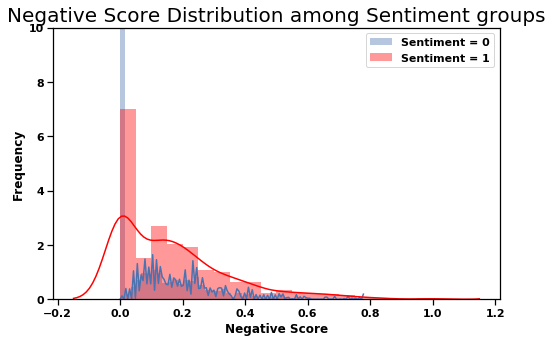

In [484]:
unique_vals = data['sentiment'].unique()
#list of sliced dataframes
targets = [data.loc[data['sentiment']==val] for val in unique_vals]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.figure(figsize=(8,5))
sns.distplot(targets[0]['neg_score'], label='Sentiment = 0')
sns.distplot(targets[1]['neg_score'], label='Sentiment = 1',color='red')
plt.ylim(top=10)
plt.xlabel('Negative Score', font)
plt.ylabel('Frequency', font)
plt.legend()
plt.title('Negative Score Distribution among Sentiment groups', fontsize=20)
plt.show()

In [485]:
data.groupby('sentiment')['neg_score'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
0,2170.0,0.045992,0.104560,0.0,0.0,0.0000,0.000,0.778
1,830.0,0.164080,0.179629,0.0,0.0,0.1285,0.245,1.000


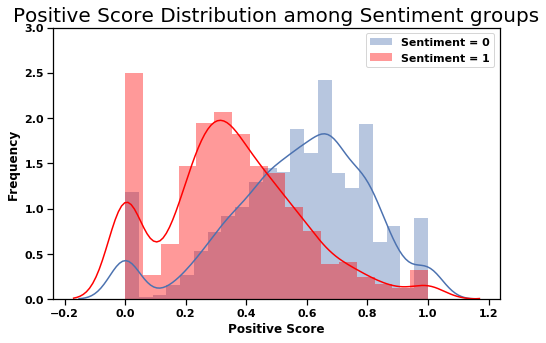

In [486]:
plt.figure(figsize=(8,5))
sns.distplot(targets[0]['pos_score'], label='Sentiment = 0')
sns.distplot(targets[1]['pos_score'], label='Sentiment = 1',color='red')
plt.ylim(top=3)
plt.xlabel('Positive Score', font)
plt.ylabel('Frequency', font)
plt.legend()
plt.title('Positive Score Distribution among Sentiment groups', fontsize=20)
plt.show()

In [487]:
data.groupby('sentiment')['pos_score'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
0,2170.0,0.568381,0.233167,0.0,0.43225,0.592,0.73200,1.0
1,830.0,0.353936,0.231135,0.0,0.21700,0.338,0.49375,1.0


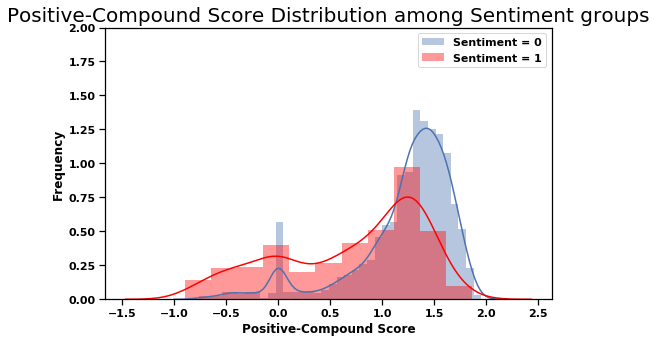

In [488]:
plt.figure(figsize=(8,5))
sns.distplot(targets[0]['pos_comp_score'], label='Sentiment = 0')
sns.distplot(targets[1]['pos_comp_score'], label='Sentiment = 1',color='red')
plt.ylim(top=2)
plt.xlabel('Positive-Compound Score', font)
plt.ylabel('Frequency', font)
plt.legend()
plt.title('Positive-Compound Score Distribution among Sentiment groups', fontsize=20)
plt.show()

In [489]:
data.groupby('sentiment')['pos_comp_score'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
0,2170.0,1.211753,0.493240,-0.7579,1.055275,1.3384,1.537325,1.9538
1,830.0,0.710452,0.685469,-0.9020,0.077225,0.9324,1.271200,1.8689


### Modelling

In [490]:
from sklearn.model_selection import train_test_split

# Train-Test split for Count Vectorized Matrix
X_train, X_val, y_train, y_val = train_test_split(data[['clean_review_lemmatized', 'clean_review_tokenized','word_count',
                                                        'neg_score','pos_score', 'pos_comp_score']], data['sentiment'],
                                                  test_size=0.2, stratify=data[['sentiment']], random_state=123)
print(X_train.shape)
print(X_val.shape,'\n')
print(y_train.shape)
print(y_val.shape,'\n')
print(y_train.value_counts(normalize=True),'\n')
print(y_val.value_counts(normalize=True))

(2400, 6)
(600, 6) 

(2400,)
(600,) 

0    0.723333
1    0.276667
Name: sentiment, dtype: float64 

0    0.723333
1    0.276667
Name: sentiment, dtype: float64


#### Standardizing 'numerical' features

In [491]:
X_train.describe()

,word_count,neg_score,pos_score,pos_comp_score
count,2400.000000,2400.000000,2400.000000,2400.000000
mean,31.035417,0.078869,0.511004,1.075395
std,47.129074,0.138923,0.252444,0.596412
min,2.000000,0.000000,0.000000,-0.902000
25%,10.000000,0.000000,0.342750,0.861900
50%,18.000000,0.000000,0.524000,1.265800
75%,34.000000,0.128000,0.688000,1.483775
max,797.000000,1.000000,1.000000,1.953800


In [492]:
num_attr = ['word_count', 'neg_score', 'pos_score', 'pos_comp_score']

In [493]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[num_attr] = sc.fit_transform(X=X_train[num_attr])
X_val[num_attr] = sc.transform(X_val[num_attr])

In [494]:
X_train.head()

,clean_review_lemmatized,clean_review_tokenized,word_count,neg_score,pos_score,pos_comp_score
2042,flat boring love beyonce voice wanna scream sc...,flat boring love beyonce voice wanna scream sc...,-0.191756,1.966472,-0.851866,-1.220543
1485,ahhhhhhh savenyahhhhhh,ahhhhhhh savenyahhhhhh,-0.616211,-0.567838,-2.024647,-1.803483
2526,movie child super violent dark scary no redeem...,movie child super violent dark scary no redeem...,0.084139,3.392021,-1.323356,-2.851635
2494,ok prefer original version,ok prefer original version,-0.488875,-0.567838,0.717125,0.266491
356,like movie animation fantastic animal show exp...,like movie animation fantastic animal show exp...,-0.234202,-0.567838,0.154507,0.337933


In [495]:
X_train.describe()

,word_count,neg_score,pos_score,pos_comp_score
count,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03
mean,2.322216e-17,1.483998e-16,7.822446e-17,2.485280e-16
std,1.000208e+00,1.000208e+00,1.000208e+00,1.000208e+00
min,-6.162113e-01,-5.678377e-01,-2.024647e+00,-3.316176e+00
25%,-4.464293e-01,-5.678377e-01,-6.666378e-01,-3.580398e-01
50%,-2.766473e-01,-5.678377e-01,5.149241e-02,3.193180e-01
75%,6.291660e-02,3.537294e-01,7.012765e-01,6.848715e-01
max,1.625587e+01,6.631905e+00,1.937451e+00,1.473124e+00


### Creating different types of Numerical Datasets:
1. Non-negative Count Vectorized, TFIDF Vectorized on 'Lemmatized Reviews' (For Naive Bayes Algorithms) : **X_train_01_cv**,  **X_train_01_tf** 


2. Non-negative Count Vectorized, TFIDF Vectorized on 'Tokenized Reviews' (For Naive Bayes Algorithms) : **X_train_02_cv**,  **X_train_02_tf**


3. Count Vectorized, TFIDF Vectorized on 'Lemmatized Reviews': **X_train_1_cv**,  **X_train_1_tf**


4. Count Vectorized, TFIDF Vectorized on 'Tokenized Reviews' : **X_train_2_cv**,  **X_train_2_tf**


5. Non-negative Oversampled (SMOTE) Count Vectorized on 'Lemmatized Reviews' (For Naive Bayes Algorithm): **os_X_train_0_cv**


6. Oversampled (SMOTE) TFIDF Vectorized on 'Lemmatized Reviews' : **os_X_train**

#### Word Embedding for 'clean_review_lemmatized' 

In [496]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW-Bag of Words features
cv = CountVectorizer(min_df=1, max_df=1.0, ngram_range=(1,1))   # max_features=1500,
X_train_cv = cv.fit_transform(X_train['clean_review_lemmatized'])   # Count Vector Matrix
X_val_cv = cv.transform(X_val['clean_review_lemmatized'])

# build TFIDF features
tf = TfidfVectorizer(min_df=0.001, max_df=1.0, ngram_range=(1,5), sublinear_tf=True)  # max_features=1500, tf=1+log(tf)
X_train_tf = tf.fit_transform(X_train['clean_review_lemmatized'])   # TFIDF Matrix
X_val_tf = tf.transform(X_val['clean_review_lemmatized'])

#### Creating Non-negative data for Naive-Bayes Classifiers

In [497]:
# Word Embedding for 'clean_review_lemmatized' - 01  (non-negative matrices for NB Classifiers)

# Convert to Dataframe/Matrix
X_train_01_cv = pd.DataFrame(X_train_cv.todense())
X_val_01_cv = pd.DataFrame(X_val_cv.todense())
X_train_01_cv[num_attr] = pd.DataFrame(sc.inverse_transform(X_train[num_attr]), columns=num_attr)
X_val_01_cv[num_attr] = pd.DataFrame(sc.inverse_transform(X_val[num_attr]), columns=num_attr)

# 'pos_comp_score': contains negative values, Dropped
X_train_01_cv.drop(['pos_comp_score'], axis=1, inplace=True)
X_val_01_cv.drop(['pos_comp_score'], axis=1, inplace=True)

# Convert to Dataframe/Matrix

X_train_01_tf = pd.DataFrame(X_train_tf.todense())
X_val_01_tf = pd.DataFrame(X_val_tf.todense())
X_train_01_tf[num_attr] = pd.DataFrame(sc.inverse_transform(X_train[num_attr]), columns=num_attr)
X_val_01_tf[num_attr] = pd.DataFrame(sc.inverse_transform(X_val[num_attr]), columns=num_attr)

X_train_01_tf.drop(['pos_comp_score'], axis=1, inplace=True)
X_val_01_tf.drop(['pos_comp_score'], axis=1, inplace=True)

In [498]:
print(X_train_01_tf[['word_count','neg_score', 'pos_score',]].describe())
print(X_val_01_tf[['word_count','neg_score', 'pos_score',]].describe())

        word_count    neg_score    pos_score
count  2400.000000  2400.000000  2400.000000
mean     31.035417     0.078869     0.511004
std      47.129074     0.138923     0.252444
min       2.000000     0.000000     0.000000
25%      10.000000     0.000000     0.342750
50%      18.000000     0.000000     0.524000
75%      34.000000     0.128000     0.688000
max     797.000000     1.000000     1.000000
       word_count   neg_score  pos_score
count  600.000000  600.000000  600.00000
mean    32.588333    0.077838    0.50124
std     58.226621    0.144656    0.24816
min      2.000000    0.000000    0.00000
25%     10.000000    0.000000    0.32975
50%     19.000000    0.000000    0.51100
75%     34.000000    0.115500    0.68175
max    891.000000    0.818000    1.00000


In [499]:
print(X_train_01_cv.shape)
print(X_val_01_cv.shape)

print(X_train_01_tf.shape)
print(X_val_01_tf.shape)

(2400, 3254)
(600, 3254)
(2400, 2495)
(600, 2495)


#### Includes All Standardized Numerical Attributes for other Machine Learning Algorithms
#### 'clean_review_lemmatized' - 1

In [500]:
# Convert to Dataframe/Matrix
X_train_1_cv = pd.DataFrame(X_train_cv.todense())
X_val_1_cv = pd.DataFrame(X_val_cv.todense())

X_train_1_cv[num_attr] = X_train[num_attr].reset_index(drop=True)
X_val_1_cv[num_attr] = X_val[num_attr].reset_index(drop=True)


# Convert to Dataframe/Matrix
X_train_1_tf = pd.DataFrame(X_train_tf.todense())
X_val_1_tf = pd.DataFrame(X_val_tf.todense())

X_train_1_tf[num_attr] = X_train[num_attr].reset_index(drop=True)
X_val_1_tf[num_attr] = X_val[num_attr].reset_index(drop=True)

In [501]:
print(X_train_1_cv.shape)
print(X_val_1_cv.shape)

print(X_train_1_tf.shape)
print(X_val_1_tf.shape)

(2400, 3255)
(600, 3255)
(2400, 2496)
(600, 2496)


#### Word Embedding for 'clean_review_tokenized' - 2

In [502]:
# build BOW-Bag of Words features
cv = CountVectorizer(min_df=1, max_df=1.0, ngram_range=(1,1))   # max_features=1500,
X_train_cv = cv.fit_transform(X_train['clean_review_tokenized'])   # Count Vector Matrix
X_val_cv = cv.transform(X_val['clean_review_tokenized'])

# build TFIDF features
tf = TfidfVectorizer(min_df=0.001, max_df=1.0, ngram_range=(1,5), sublinear_tf=True)  # max_features=1500, tf=1+log(tf)
X_train_tf = tf.fit_transform(X_train['clean_review_tokenized'])   # TFIDF Matrix
X_val_tf = tf.transform(X_val['clean_review_tokenized'])

#### Creating Non-negative data for Naive-Bayes Classifiers

In [503]:
# Word Embedding for 'clean_review_tokenized' - 02  (non-negative matrices for NB Classifiers)

# Convert to Dataframe/Matrix
X_train_02_cv = pd.DataFrame(X_train_cv.todense())
X_val_02_cv = pd.DataFrame(X_val_cv.todense())
X_train_02_cv[num_attr] = pd.DataFrame(sc.inverse_transform(X_train[num_attr]), columns=num_attr)
X_val_02_cv[num_attr] = pd.DataFrame(sc.inverse_transform(X_val[num_attr]), columns=num_attr)

# 'pos_comp_score': contains negative values, Dropped
X_train_02_cv.drop(['pos_comp_score'], axis=1, inplace=True)
X_val_02_cv.drop(['pos_comp_score'], axis=1, inplace=True)

# Convert to Dataframe/Matrix

X_train_02_tf = pd.DataFrame(X_train_tf.todense())
X_val_02_tf = pd.DataFrame(X_val_tf.todense())
X_train_02_tf[num_attr] = pd.DataFrame(sc.inverse_transform(X_train[num_attr]), columns=num_attr)
X_val_02_tf[num_attr] = pd.DataFrame(sc.inverse_transform(X_val[num_attr]), columns=num_attr)

X_train_02_tf.drop(['pos_comp_score'], axis=1, inplace=True)
X_val_02_tf.drop(['pos_comp_score'], axis=1, inplace=True)

In [504]:
print(X_train_02_tf[['word_count','neg_score', 'pos_score',]].describe())
print(X_val_02_tf[['word_count','neg_score', 'pos_score',]].describe())

        word_count    neg_score    pos_score
count  2400.000000  2400.000000  2400.000000
mean     31.035417     0.078869     0.511004
std      47.129074     0.138923     0.252444
min       2.000000     0.000000     0.000000
25%      10.000000     0.000000     0.342750
50%      18.000000     0.000000     0.524000
75%      34.000000     0.128000     0.688000
max     797.000000     1.000000     1.000000
       word_count   neg_score  pos_score
count  600.000000  600.000000  600.00000
mean    32.588333    0.077838    0.50124
std     58.226621    0.144656    0.24816
min      2.000000    0.000000    0.00000
25%     10.000000    0.000000    0.32975
50%     19.000000    0.000000    0.51100
75%     34.000000    0.115500    0.68175
max    891.000000    0.818000    1.00000


In [505]:
print(X_train_02_cv.shape)
print(X_val_02_cv.shape)

print(X_train_02_tf.shape)
print(X_val_02_tf.shape)

(2400, 3254)
(600, 3254)
(2400, 2495)
(600, 2495)


#### Includes All Standardized Numerical Attributes for other Machine Learning Algorithms
#### 'clean_review_tokenized' - 2

In [506]:
# Convert to Dataframe/Matrix
X_train_2_cv = pd.DataFrame(X_train_cv.todense())
X_val_2_cv = pd.DataFrame(X_val_cv.todense())

X_train_2_cv[num_attr] = X_train[num_attr].reset_index(drop=True)
X_val_2_cv[num_attr] = X_val[num_attr].reset_index(drop=True)

# Convert to Dataframe/Matrix
X_train_2_tf = pd.DataFrame(X_train_tf.todense())
X_val_2_tf = pd.DataFrame(X_val_tf.todense())

X_train_2_tf[num_attr] = X_train[num_attr].reset_index(drop=True)
X_val_2_tf[num_attr] = X_val[num_attr].reset_index(drop=True)

In [507]:
print(X_train_2_cv.shape)
print(X_val_2_cv.shape)

print(X_train_2_tf.shape)
print(X_val_2_tf.shape)

(2400, 3255)
(600, 3255)
(2400, 2496)
(600, 2496)


#### Creating Oversampled Dataset using SMOTE (For  Sentiment = 1 class)

In [508]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
os_X_train, os_y_train=smote.fit_sample(X_train_1_tf, y_train)
os_X_train = pd.DataFrame(data=os_X_train)
os_y_train= pd.DataFrame(data=os_y_train,columns=['sentiment'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_X_train))
print("Number of Sentiment=0 in oversampled data",len(os_y_train[os_y_train['sentiment']==0]))
print("Number of Sentiment=1",len(os_y_train[os_y_train['sentiment']==1]))
print("Proportion of Sentiment=0 data in oversampled data is ",len(os_y_train[os_y_train['sentiment']==0])/len(os_X_train))
print("Proportion of Sentiment=1 data in oversampled data is ",len(os_y_train[os_y_train['sentiment']==1])/len(os_X_train))

length of oversampled data is  3472
Number of Sentiment=0 in oversampled data 1736
Number of Sentiment=1 1736
Proportion of Sentiment=0 data in oversampled data is  0.5
Proportion of Sentiment=1 data in oversampled data is  0.5


In [509]:
print(os_X_train.shape)
print(os_y_train.shape)

(3472, 2496)
(3472, 1)


#### Creating non-negative Oversampled Dataset by NB Classifier

In [510]:
smote = SMOTE(random_state=123)
os_X_train_0_cv, os_y_train_0_cv=smote.fit_sample(X_train_01_cv, y_train)
os_X_train_0_cv = pd.DataFrame(data=os_X_train_0_cv)
os_y_train_0_cv= pd.DataFrame(data=os_y_train_0_cv,columns=['sentiment'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_X_train_0_cv))
print("Number of Sentiment=0 in oversampled data",len(os_y_train_0_cv[os_y_train_0_cv['sentiment']==0]))
print("Number of Sentiment=1",len(os_y_train_0_cv[os_y_train_0_cv['sentiment']==1]))
print("Proportion of Sentiment=0 data in oversampled data is ",len(os_y_train_0_cv[os_y_train_0_cv['sentiment']==0])/len(os_X_train_0_cv))
print("Proportion of Sentiment=1 data in oversampled data is ",len(os_y_train_0_cv[os_y_train_0_cv['sentiment']==1])/len(os_X_train_0_cv))

length of oversampled data is  3472
Number of Sentiment=0 in oversampled data 1736
Number of Sentiment=1 1736
Proportion of Sentiment=0 data in oversampled data is  0.5
Proportion of Sentiment=1 data in oversampled data is  0.5


In [511]:
print(os_X_train_0_cv.shape)
print(os_y_train_0_cv.shape)

(3472, 3254)
(3472, 1)


## 1. ML Approach

#### Pre-defining Common Modelling Functions/Utilities

In [512]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),4))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='binary'),4))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='binary'),4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='binary'),4))

    
def display_confusion_matrix(true_labels, predicted_labels, classes=[0,1]):
    
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    
    cm_frame = pd.DataFrame(data=cm, 
                        columns=pd.MultiIndex(levels=[['Predicted:'],classes], codes=[[0,0], [0,1]]),
                        # codes: codes to designate which label at each location
                        index=pd.MultiIndex(levels=[['Actual:'], classes], codes=[[0,0], [0,1]]))
    print(cm_frame) 

    
def display_classification_report(true_labels, predicted_labels, classes=[0,1]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[0,1]):
    
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


Why Naive Bayes?
1. Works well when there are more Data Points, Few features
2. Faster to predict
3. Works well for multiclass problems
4. Works well for categorical features
5. Works 

A. Multinomial Naive Bayes **(MultinomialNB)**:
    - The multinomial naive Bayes model is typically used for discrete counts.
    - If we have a **text classification problem**, we can take the idea of bernoulli trials one step further.
    - Instead of **"word occurs in the document"** we have **"count how often word occurs in the document"**
    - We look at *number of times outcome number x_i is observed over the n trials*
    - **NOTE:** we look at Frequency% of Word occurence in our document.
    
B. The Complement Naive Bayes **(ComplementNB)**:
    - Classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier.
    - **NOTE:** This is particularly suited for **Imbalanced Target classes**.

#### Store Model Performance metrics in Dataframe

In [513]:
# Create Model Performance Metrics Dataframe
model_performance = pd.DataFrame(columns={'algorithm', 'dataset', 'F1_score','accuracy', 'best_params', 'execution_time_min'})

### Models (Use Grid Search for parameter tuning)
#### 1. Complement Naive Bayes (For Imbalanced classes)
NOTE: Input Data should be non-negative!

In [514]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
c_nb = ComplementNB()
param_grid = {'alpha': [0.75,0.85,0.95,0.99]}
c_nb_grid = GridSearchCV(estimator = c_nb, param_grid = param_grid, cv = 3)

In [515]:
train_data_dict = {'X_train_01_cv':X_train_01_cv, 'X_train_01_tf':X_train_01_tf, 'X_train_02_cv':X_train_02_cv
                   , 'X_train_02_tf':X_train_02_tf}
val_data_list = [X_val_01_cv, X_val_01_tf, X_val_02_cv, X_val_02_tf]
y_train_true = y_train
y_val_true = y_val

algo_dict={'Complement_NaiveBayes':c_nb_grid}

In [516]:
# Run the Models and store the output
for i in range(len(train_data_dict.keys())):  #Selects Dataset
    for j in list(algo_dict.keys()): # Selects Algorithm
        s=time.time()
        print(f'Running: {j} Model')    
        algo_dict[j].fit(list(train_data_dict.values())[i], y_train_true)
        pred=algo_dict[j].predict(val_data_list[i])
        print(f'Execution Time: {time.time()-s}')
        print('-'*20)
        display_model_performance_metrics(y_val_true, pred)
        model_performance = model_performance.append({'algorithm':j, 'dataset':list(train_data_dict.keys())[i],'best_params':algo_dict[j].best_params_,
                           'F1_score':np.round(metrics.f1_score(y_val_true, pred,average='binary'),4),
                           'accuracy':np.round(metrics.accuracy_score(y_val_true, pred),4), 
                                       'execution_time_min':np.round((time.time()-s)/60,2)}, ignore_index=True)
        print('-'*90,'\n\n')


Running: Complement_NaiveBayes Model
Execution Time: 6.2175188064575195
--------------------
Model Performance metrics:
------------------------------
Accuracy: 0.8633
Precision: 0.7442
Recall: 0.7711
F1 Score: 0.7574

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       434
           1       0.74      0.77      0.76       166

    accuracy                           0.86       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.87      0.86      0.86       600


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0        390   44
        1         38  128
------------------------------------------------------------------------------------------ 


Running: Complement_NaiveBayes Model
Execution Time: 2.0045042037963867
--------------------
Model Performance metrics:
---------------

#### Complement NaiveBayes using Oversampled Datasets

In [517]:
train_data_dict = {'os_X_train_0_cv':os_X_train_0_cv}
val_data_list = [X_val_01_cv]
y_train_true = os_y_train_0_cv
y_val_true = y_val

algo_dict={'Complement_NaiveBayes':c_nb_grid}

In [518]:
# Run the Models and store the output
for i in range(len(train_data_dict.keys())):  #Selects Dataset
    for j in list(algo_dict.keys()): # Selects Algorithm
        s=time.time()
        print(f'Running: {j} Model')    
        algo_dict[j].fit(list(train_data_dict.values())[i], y_train_true)
        pred=algo_dict[j].predict(val_data_list[i])
        print(f'Execution Time: {time.time()-s}')
        print('-'*20)
        display_model_performance_metrics(y_val_true, pred)
        model_performance = model_performance.append({'algorithm':j, 'dataset':list(train_data_dict.keys())[i],'best_params':algo_dict[j].best_params_,
                           'F1_score':np.round(metrics.f1_score(y_val_true, pred,average='binary'),4),
                           'accuracy':np.round(metrics.accuracy_score(y_val_true, pred),4), 
                                       'execution_time_min':np.round((time.time()-s)/60,2)}, ignore_index=True)
        print('-'*90,'\n\n')


Running: Complement_NaiveBayes Model
Execution Time: 3.343984842300415
--------------------
Model Performance metrics:
------------------------------
Accuracy: 0.8433
Precision: 0.6818
Recall: 0.8133
F1 Score: 0.7418

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       434
           1       0.68      0.81      0.74       166

    accuracy                           0.84       600
   macro avg       0.80      0.83      0.81       600
weighted avg       0.86      0.84      0.85       600


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0        371   63
        1         31  135
------------------------------------------------------------------------------------------ 




#### Running Other Machine Learning Models

#### NOTE:
From prior experience, models are run here only on the datasets below due to superior performance scores.
1. X_train_2_cv
2. X_train_2_tf

In [519]:
# Classification Algorithm List
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
param_grid = {'penalty': ['l2'],
              'class_weight':[{0:.40,1:.60}]}
log_reg_grid = GridSearchCV(estimator = log_reg, param_grid = param_grid, cv = 3)

# 3. Linear SVM with SGD training
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
param_grid = {'loss':['hinge' ], 'max_iter':[100],'alpha':[0.001],
             'penalty': ['l1'], 'learning_rate':['adaptive'], 'eta0':[0.05], 
              'class_weight':[{0:.40,1:.60}]}
sgd_grid = GridSearchCV(estimator = sgd, param_grid = param_grid, cv = 3)

# 4. Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
param_grid = {'C': [1], 'kernel':['linear','rbf']}
svc_grid = RandomizedSearchCV(estimator = svc, param_distributions=param_grid, cv = 3) # cv = 3

# 5. Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid = {'criterion': ['gini'], 'max_depth': [10], 
                 'min_samples_split': [20],'min_samples_leaf': [5], 
              'class_weight':[{0:.40,1:.60}]}
dt_grid = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=5)

# 6. Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
param_grid = {'max_depth': [8], 'subsample': [0.6], 'max_features':[0.2], 
              'n_estimators': [50]}  # No. of boosting stages to perform. large num == good performance
gbm_grid = RandomizedSearchCV(gbm, param_distributions=param_grid, cv=5)

In [520]:
# Initialize Order of Datasets/Models

train_data_dict = {'X_train_2_cv':X_train_2_cv,'X_train_2_tf':X_train_2_tf}
val_data_list = [X_val_2_cv, X_val_2_tf]
y_train_true = y_train
y_val_true = y_val

algo_dict={'Logistic_Regression':log_reg_grid,'SVM_SGD':sgd_grid,'SVM_Classifier':svc_grid,
           'Decision_Tree':dt_grid,'Gradient_Boosting_Trees':gbm_grid}

In [521]:
# Run the Models and store the output

for i in list(algo_dict.keys()): # Selects Algorithm    
    for j in range(len(train_data_dict.keys())):  #Selects Dataset        
        s=time.time()
        print(f'Running: {i} Model')    
        algo_dict[i].fit(list(train_data_dict.values())[j], y_train_true)
        pred=algo_dict[i].predict(val_data_list[j])
        print(f'Execution Time: {time.time()-s}')
        print('-'*20)
        display_model_performance_metrics(y_val_true, pred)
        model_performance = model_performance.append({'algorithm':i, 'dataset':list(train_data_dict.keys())[j],
                                                      'best_params':algo_dict[i].best_params_,
                                                      'F1_score':np.round(metrics.f1_score(y_val_true, pred,average='binary'),4),
                                                      'accuracy':np.round(metrics.accuracy_score(y_val_true, pred),4),
                                                      'execution_time_min':np.round((time.time()-s)/60,2)
                                                     }, ignore_index=True)
        print('-'*90,'\n\n')

Running: Logistic_Regression Model
Execution Time: 3.570014476776123
--------------------
Model Performance metrics:
------------------------------
Accuracy: 0.8567
Precision: 0.7564
Recall: 0.7108
F1 Score: 0.7329

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       434
           1       0.76      0.71      0.73       166

    accuracy                           0.86       600
   macro avg       0.82      0.81      0.82       600
weighted avg       0.85      0.86      0.86       600


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0        396   38
        1         48  118
------------------------------------------------------------------------------------------ 


Running: Logistic_Regression Model
Execution Time: 1.8818306922912598
--------------------
Model Performance metrics:
--------------------



Prediction Confusion Matrix:
------------------------------
          Predicted:    
                   0   1
Actual: 0        403  31
        1         73  93
------------------------------------------------------------------------------------------ 




#### Prediction on Oversampled Data

In [522]:
# Initialize Order of Datasets/Models

train_data_dict = {'os_X_train':os_X_train}
val_data_list = [X_val_1_tf]
y_train_true = os_y_train
y_val_true = y_val

algo_dict={'Logistic_Regression':log_reg_grid,'SVM_SGD':sgd_grid,'SVM_Classifier':svc_grid,
           'Decision_Tree':dt_grid,'Gradient_Boosting_Trees':gbm_grid}

In [523]:
# Run the Models and store the output

for i in list(algo_dict.keys()): # Selects Algorithm
    
    for j in range(len(train_data_dict.keys())):  #Selects Dataset        
        s=time.time()
        print(f'Running: {i} Model')    
        algo_dict[i].fit(list(train_data_dict.values())[j], y_train_true)
        pred=algo_dict[i].predict(val_data_list[j])
        print(f'Execution Time: {time.time()-s}')
        print('-'*20)
        display_model_performance_metrics(y_val_true, pred)
        model_performance = model_performance.append({'algorithm':i, 'dataset':list(train_data_dict.keys())[j],
                                                      'best_params':algo_dict[i].best_params_,
                                                      'F1_score':np.round(metrics.f1_score(y_val_true, pred,average='binary'),4),
                                                      'accuracy':np.round(metrics.accuracy_score(y_val_true, pred),4),
                                                      'execution_time_min':np.round((time.time()-s)/60,2)
                                                     }, ignore_index=True)
        print('-'*90,'\n\n')

Running: Logistic_Regression Model
Execution Time: 1.1336698532104492
--------------------
Model Performance metrics:
------------------------------
Accuracy: 0.8
Precision: 0.5983
Recall: 0.8434
F1 Score: 0.7

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       434
           1       0.60      0.84      0.70       166

    accuracy                           0.80       600
   macro avg       0.76      0.81      0.78       600
weighted avg       0.84      0.80      0.81       600


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0        340   94
        1         26  140
------------------------------------------------------------------------------------------ 


Running: SVM_SGD Model
Execution Time: 19.04456090927124
--------------------
Model Performance metrics:
------------------------------
Accurac

## Deep Learning
Datasets used:
1. TFIDF, Count Vectorized Datasets
2. Word-Index Mapped Padded Sequences
3. Pre-learnt Word Embeddings (GLoVe)

Model types used:
1. Multi-Layered Perceptrons
2. LSTM

In [524]:
print(X_train_2_cv.shape,'\n')
print(X_train_2_tf.shape)

(2400, 3255) 

(2400, 2496)


#### 1.  MLP with 3 layers using 'X_train_2_tf' dataset

- 1st hidden layer with 25 neurons
- 2nd hidden layer with 15 neurons

In [525]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# !pip install tensorflow
import tensorflow as tf
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from keras.utils import to_categorical
from keras import optimizers
from keras.callbacks import Callback
from keras import backend as K

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [528]:
np.random.seed(13)

tf.set_random_seed(13)
mlp_model = Sequential()

mlp_model.add(Dense(25, input_dim=2496, activation='relu', kernel_initializer='normal'))
mlp_model.add(Dense(15, activation='relu', kernel_initializer='normal'))
mlp_model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
print(mlp_model.summary())
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 25)                62425     
_________________________________________________________________
dense_25 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 16        
Total params: 62,831
Trainable params: 62,831
Non-trainable params: 0
_________________________________________________________________
None


In [529]:
s=time.time()
model_history = mlp_model.fit(X_train_2_tf, y_train, epochs=30, batch_size=64, validation_split=0.2, )

Train on 1920 samples, validate on 480 samples
Epoch 1/30
1920/1920 [==============================] - ETA: 1:27 - loss: 0.6934 - acc: 0.265 - ETA: 19s - loss: 0.6929 - acc: 0.535 - ETA: 10s - loss: 0.6924 - acc: 0.63 - ETA: 6s - loss: 0.6920 - acc: 0.6562 - ETA: 4s - loss: 0.6914 - acc: 0.676 - ETA: 2s - loss: 0.6911 - acc: 0.676 - ETA: 1s - loss: 0.6907 - acc: 0.676 - ETA: 1s - loss: 0.6903 - acc: 0.684 - ETA: 0s - loss: 0.6897 - acc: 0.692 - ETA: 0s - loss: 0.6891 - acc: 0.696 - 4s 2ms/step - loss: 0.6885 - acc: 0.7005 - val_loss: 0.6813 - val_acc: 0.7521
Epoch 2/30
1920/1920 [==============================] - ETA: 0s - loss: 0.6796 - acc: 0.734 - ETA: 0s - loss: 0.6804 - acc: 0.730 - ETA: 0s - loss: 0.6800 - acc: 0.727 - ETA: 0s - loss: 0.6788 - acc: 0.737 - ETA: 0s - loss: 0.6780 - acc: 0.736 - ETA: 0s - loss: 0.6766 - acc: 0.741 - ETA: 0s - loss: 0.6753 - acc: 0.745 - ETA: 0s - loss: 0.6738 - acc: 0.752 - ETA: 0s - loss: 0.6724 - acc: 0.753 - ETA: 0s - loss: 0.6705 - acc: 0.757 -

##### Plot

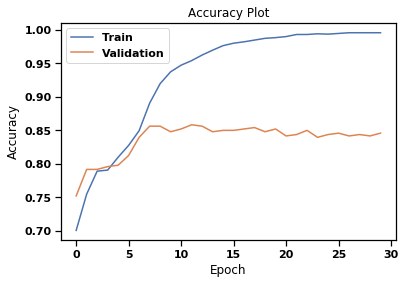

In [530]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy Plot')
# plt.ylim((0.85,1.005))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Predictions

In [531]:
pred = mlp_model.predict_classes(X_val_2_tf)
display_model_performance_metrics(y_val,pred)
model_performance = model_performance.append({'algorithm':'MLP_2_HidLayer', 'dataset':'X_train_2_tf',
                                                      'F1_score':np.round(metrics.f1_score(y_val, pred,average='binary'),4),
                                                      'accuracy':np.round(metrics.accuracy_score(y_val, pred),4),
                                                      'execution_time_min':np.round((time.time()-s)/60,2)
                                                     }, ignore_index=True)

Model Performance metrics:
------------------------------
Accuracy: 0.8167
Precision: 0.6918
Recall: 0.6084
F1 Score: 0.6474

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       434
           1       0.69      0.61      0.65       166

    accuracy                           0.82       600
   macro avg       0.77      0.75      0.76       600
weighted avg       0.81      0.82      0.81       600


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0        389   45
        1         65  101


#### 2. LSTM with Word-Index Mapped Padded Sequences

In [532]:
tokenized_train = [text.split(" ") for text in X_train['clean_review_lemmatized']] # List of reviews(s)
tokenized_val = [text.split(" ") for text in X_val['clean_review_lemmatized']]

#### Build Vocabulary Mapping (word to index)

In [533]:
from collections import Counter  # counts number of unique elements in list

# # build word to index vocabulary
token_counter = Counter([token for review in tokenized_train for token in review])   # dict(word: count)
vocab_map = {item[0]: index+1 for index, item in enumerate(dict(token_counter).items())}
max_index = np.max(list(vocab_map.values()))   # reviews vocab size = 3271 
vocab_map['pad_index'] = 0
vocab_map['not_found_index'] = max_index+1
vocab_size = len(vocab_map)
# view vocabulary size and part of the vocabulary map
print('Vocabulary Size:', vocab_size)
print('Sample slice of vocabulary map:', dict(list(vocab_map.items())[10:20]))

Vocabulary Size: 3273
Sample slice of vocabulary map: {'movie': 11, 'child': 12, 'super': 13, 'violent': 14, 'dark': 15, 'scary': 16, 'no': 17, 'redeem': 18, 'message': 19, 'waste': 20}


#### Encode and Pad datasets & Encode prediction class labels

In [534]:
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# get max length of train corpus and initialize label encoder
num_classes=2 # positive -> 1, negative -> 0

# max_len = np.max([len(review) for review in tokenized_train])
# we define length of Review to be 500 words for all sentences
max_len = 500

## Train reviews data corpus
# Convert tokenized text reviews to numeric vectors
X_train_seq = [[vocab_map[token] for token in tokenized_review] for tokenized_review in tokenized_train]
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len) # pad 

## validation reviews data corpus
# Convert tokenized text reviews to numeric vectors
X_val_seq = [[vocab_map[token] if vocab_map.get(token) else vocab_map['not_found_index'] 
           for token in tokenized_review] for tokenized_review in tokenized_val]
X_val_seq = sequence.pad_sequences(X_val_seq, maxlen=max_len)

# view vector shapes
print('Max length of train review vectors:', max_len)
print('Train review vectors shape:', X_train_seq.shape, ' Validation review vectors shape:', X_val_seq.shape)

Max length of train review vectors: 500
Train review vectors shape: (2400, 500)  Validation review vectors shape: (600, 500)


In [535]:
print(X_train_seq.shape)
print(X_val_seq.shape)
print(y_train.shape)
print(y_val.shape)

(2400, 500)
(600, 500)
(2400,)
(600,)


#### Build the LSTM Model Architecture

In [536]:
print(vocab_size)
print(max_len)
# Can use max_len = 500 (>377)

3273
500


In [537]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM

EMBEDDING_DIM = 50 # dimension for dense embeddings for each token
LSTM_DIM = 64 # total LSTM units

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(LSTM_DIM, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

print(model.summary())
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 50)           163650    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 500, 50)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 193,155
Trainable params: 193,155
Non-trainable params: 0
_________________________________________________________________
None


#### Train the model

In [538]:
batch_size = 64
s=time.time()
model_history = model.fit(X_train_seq, y_train, epochs=10, batch_size=batch_size, 
          shuffle=True, validation_split=0.1, verbose=1)

Train on 2160 samples, validate on 240 samples
Epoch 1/10
2160/2160 [==============================] - ETA: 3:40 - loss: 0.6925 - acc: 0.500 - ETA: 2:07 - loss: 0.6906 - acc: 0.609 - ETA: 1:32 - loss: 0.6891 - acc: 0.619 - ETA: 1:12 - loss: 0.6869 - acc: 0.648 - ETA: 1:00 - loss: 0.6856 - acc: 0.656 - ETA: 52s - loss: 0.6829 - acc: 0.664 - ETA: 45s - loss: 0.6794 - acc: 0.67 - ETA: 40s - loss: 0.6744 - acc: 0.69 - ETA: 36s - loss: 0.6698 - acc: 0.69 - ETA: 32s - loss: 0.6662 - acc: 0.69 - ETA: 29s - loss: 0.6625 - acc: 0.69 - ETA: 27s - loss: 0.6576 - acc: 0.70 - ETA: 24s - loss: 0.6500 - acc: 0.70 - ETA: 22s - loss: 0.6407 - acc: 0.71 - ETA: 20s - loss: 0.6347 - acc: 0.71 - ETA: 18s - loss: 0.6303 - acc: 0.71 - ETA: 17s - loss: 0.6250 - acc: 0.72 - ETA: 15s - loss: 0.6229 - acc: 0.72 - ETA: 14s - loss: 0.6202 - acc: 0.72 - ETA: 13s - loss: 0.6137 - acc: 0.72 - ETA: 11s - loss: 0.6134 - acc: 0.72 - ETA: 10s - loss: 0.6105 - acc: 0.72 - ETA: 9s - loss: 0.6101 - acc: 0.7215 - ETA: 8s - l

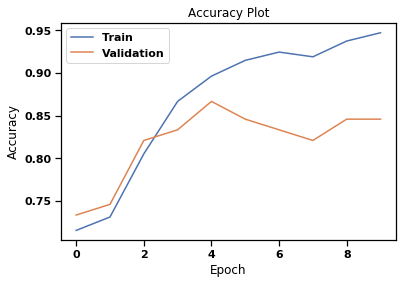

In [541]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy Plot')
# plt.ylim((0.85,1.005))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [539]:
pred_val = model.predict_classes(X_val_seq)
pred = pred_val.flatten()
display_model_performance_metrics(true_labels=y_val, predicted_labels=pred)
model_performance = model_performance.append({'algorithm':'LSTM', 'dataset':'X_train_seq',
                                                      'F1_score':np.round(metrics.f1_score(y_val, pred,average='binary'),4),
                                                      'accuracy':np.round(metrics.accuracy_score(y_val, pred),4),
                                                      'execution_time_min':np.round((time.time()-s)/60,2)
                                                     }, ignore_index=True)

Model Performance metrics:
------------------------------
Accuracy: 0.835
Precision: 0.7279
Recall: 0.6446
F1 Score: 0.6837

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       434
           1       0.73      0.64      0.68       166

    accuracy                           0.83       600
   macro avg       0.80      0.78      0.79       600
weighted avg       0.83      0.83      0.83       600


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0        394   40
        1         59  107


#### 3. Models using GLoVe

In [542]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input,Embedding,Dense,Flatten,concatenate
from keras.models import Model

from IPython.display import Image

### Pre-procressing of numerical variables

#### Split the data into train and test
Dataframe is split of categorized based on dtype:
1. Categorical Features
2. Numerical Features
3. String/Text Features
4. Categorical Embedding Features

X-y Train-Test split performed prior to Pre-processing 

#### Preprocessing of Target variables

In [543]:
# OHE must be reimported to be initialized afresh
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
ohe_y = onehotencoder.fit(y_train.values.reshape(-1, 1))

In [544]:
#Reshape Target to 'vector' valued array
ohe_y_train = ohe_y.transform(y_train.values.reshape(-1, 1)).toarray()
ohe_y_val = ohe_y.transform(y_val.values.reshape(-1, 1)).toarray()

In [545]:
no_of_levels=2
print('No of Target Levels', no_of_levels)
print(ohe_y_train.shape)
ohe_y_train

No of Target Levels 2
(2400, 2)


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

#### Numerical Feature Dataframe

In [546]:
X_train_num = X_train[num_attr]
X_val_num = X_val[num_attr]

### Text or String Preprocessing for 'clean_review_lemmatized'


In [549]:
tokenizer = Tokenizer(oov_token='None')
tokenizer.fit_on_texts(X_train['clean_review_lemmatized']) # Updates internal vocabulary based on a list of texts
X_train_text = tokenizer.texts_to_sequences(X_train['clean_review_lemmatized']) # Transforms each text in texts to a sequence of integers
X_val_text = tokenizer.texts_to_sequences(X_val['clean_review_lemmatized'])

### Format of:  'X_train_text', 'X_val_text'

In [550]:
print(X_train['clean_review_lemmatized'].iloc[0,],'\n')
print(X_train_text[0],'\n')  #len = 13173
print(X_val['clean_review_lemmatized'].iloc[0,], '\n')
print(X_val_text[0])    #len = 6489

flat boring love beyonce voice wanna scream screen 

[218, 219, 4, 47, 11, 1139, 1140, 220] 

love animate version son pleasure watch daughter totally meet expectation 

[4, 25, 14, 221, 1219, 16, 137, 302, 962, 403]


In [551]:
# tokenizer.word_index: A dictionary of words and their uniquely assigned integers
word_index = tokenizer.word_index
# tokenizer.word_docs['original']

print(f'Found {len(word_index)} unique tokens.')
review_vocab = len(word_index)+1  # length of words in train vocab/corpus,+1 for flexi space, len=11987

Found 3271 unique tokens.


In [552]:
train_review = X_train['clean_review_lemmatized'].apply(lambda x: x.split(" "))
print(f'Average Length of Train Reviews {train_review.apply(len).mean()} words')
print(f'Median Length of Train Reviews {train_review.apply(len).median()} words')
print(f'Max Length of Train Reviews {train_review.apply(len).max()} words\n')
max_seq_len=500
print(f'Have set the Max Sequence Length of Review to be {max_seq_len} words')

Average Length of Train Reviews 11.8 words
Median Length of Train Reviews 7.0 words
Max Length of Train Reviews 377 words

Have set the Max Sequence Length of Review to be 500 words


#### Pads sequences to the same length.

In [553]:
# Review length limit=500 words
X_train_text = pad_sequences(X_train_text, maxlen=max_seq_len)
X_val_text = pad_sequences(X_val_text, maxlen=max_seq_len)

In [554]:
print(X_train['clean_review_lemmatized'].iloc[0,])
print('1st Review in Padded Seq format:', X_train_text[0],'\n')  # Full Numerical Sentence

flat boring love beyonce voice wanna scream screen
1st Review in Padded Seq format: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

#### Using GloVe word embedding 

1. GloVe is an unsupervised learning algorithm for obtaining vector representations for words.
2. Training is performed on aggregated global word-word co-occurrence statistics from a corpus.
3. Resulting representations showcase interesting <u>linear substructures of the word vector space</u>.

Is loaded into memory as a dictionary of word to embedding array.
**embeddings_index** : dict() that store the embedding values for the keys/words within the 50d/100d glove word embedding

In [555]:
# load the whole 100d Glove word embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', encoding='utf8')   #contains 400,000 word vectors
for line in f:
    values = line.split()   # element is of class 'str', splits entire string by ' ' , stores in []
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [557]:
embeddings_index['the'].shape   # sampe vector embedding of word

(100,)

#### Enumerate all unique words in 'tokenizer.word_index' --> locate embedding weight vector from GloVe 'embedding_index'

In [558]:
# create a weight matrix for words in training docs
# Identify words of Train data not in GloVe

review_embedding_matrix = np.zeros((review_vocab,100))   # shape  of array (3272, 50)
review_word_not_in_glove_count = 0
review_word_not_in_glove = []

# tokenizer.word_index is {unique_word(s) : unique integer assigned to word}
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    # searches word embedding dict() for embedding value/vector, else returns default.
    # NOTE: dict().get(key, default) is different from dict()[key], better keyerror handling
    
    if embedding_vector is not None:
        review_embedding_matrix[i] = embedding_vector
    else:
        review_word_not_in_glove.append(word)
        review_word_not_in_glove_count += 1

In [559]:
print(review_word_not_in_glove[:15],'\n')
print(review_word_not_in_glove_count)

['None', 'pumba', 'mufasas', 'grandkid', 'timone', 'simbas', 'breathtake', 'nalas', 'favreaus', 'underwhelme', 'heartwarme', 'ahhhhhhh', 'mogli', 'hearte', 'goosebump'] 

240


In [560]:
review_embedding_matrix.shape  # num of unique words, glove weights

(3272, 100)

#### Dense layer for numerical features

In [561]:
num_cat_inputs = Input(shape=(X_train_num.shape[1],),name='num_cat_inputs')
out_num_cat = Dense(64, activation='relu')(num_cat_inputs)

#### Embedding layer for Review Text

#### If there are more than one word in the training data which are not present in Glove then train the embedding layer

In [562]:
print('No of corpus words not in Glove',review_word_not_in_glove_count)
print('Input Layer shape :', max_seq_len)
print('Embedding Layer shape :', review_vocab)

No of corpus words not in Glove 240
Input Layer shape : 500
Embedding Layer shape : 3272


In [563]:
review_text_input= Input(shape=(max_seq_len,),name='review_text_input')

text_embed = Embedding(input_dim=review_vocab,output_dim=100,weights=[review_embedding_matrix],trainable=True)(review_text_input)
# NOTE:trainable=True enables synapse weights(from GloVe) be updated in Backprpgtn
review_out_text = Flatten()(text_embed)   # 2nd Flattening Layer

#### Concatenate the output of above layers.

In [564]:
#Functional interface to the Concatenate layer.
# inputs: A list of input tensors (at least 2). axis: Concatenation axis.
# Returns: A tensor, the concatenation of the inputs alongside axis specified.
concatenated = concatenate([out_num_cat,review_out_text],axis=-1)

X = Dense(8, activation='relu')(concatenated)
final_out = Dense(no_of_levels, activation='softmax')(X)

In [568]:
model = Model(inputs=[num_cat_inputs, review_text_input], outputs=final_out)
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trains the model for a given number of epochs (iterations on a dataset)
s=time.time()
model_history = model.fit(x = [X_train_num, X_train_text], y = ohe_y_train, epochs=10,validation_split=0.20)  # epoch or batch iteration = 10

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
review_text_input (InputLayer)  (None, 500)          0                                            
__________________________________________________________________________________________________
num_cat_inputs (InputLayer)     (None, 4)            0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 500, 100)     327200      review_text_input[0][0]          
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 64)           320         num_cat_inputs[0][0]             
____________________________________________________________________________________________

1920/1920 [==============================] - ETA: 2s - loss: 0.0225 - acc: 1.000 - ETA: 1s - loss: 0.0088 - acc: 1.000 - ETA: 1s - loss: 0.0078 - acc: 1.000 - ETA: 1s - loss: 0.0072 - acc: 1.000 - ETA: 1s - loss: 0.0093 - acc: 0.996 - ETA: 1s - loss: 0.0079 - acc: 0.997 - ETA: 1s - loss: 0.0072 - acc: 0.997 - ETA: 1s - loss: 0.0072 - acc: 0.997 - ETA: 1s - loss: 0.0069 - acc: 0.998 - ETA: 1s - loss: 0.0062 - acc: 0.998 - ETA: 1s - loss: 0.0074 - acc: 0.997 - ETA: 1s - loss: 0.0075 - acc: 0.997 - ETA: 1s - loss: 0.0109 - acc: 0.995 - ETA: 1s - loss: 0.0102 - acc: 0.995 - ETA: 1s - loss: 0.0105 - acc: 0.994 - ETA: 0s - loss: 0.0121 - acc: 0.994 - ETA: 0s - loss: 0.0119 - acc: 0.994 - ETA: 0s - loss: 0.0127 - acc: 0.993 - ETA: 0s - loss: 0.0121 - acc: 0.994 - ETA: 0s - loss: 0.0117 - acc: 0.994 - ETA: 0s - loss: 0.0113 - acc: 0.994 - ETA: 0s - loss: 0.0109 - acc: 0.994 - ETA: 0s - loss: 0.0107 - acc: 0.995 - ETA: 0s - loss: 0.0107 - acc: 0.995 - ETA: 0s - loss: 0.0131 - acc: 0.994 - ETA: 

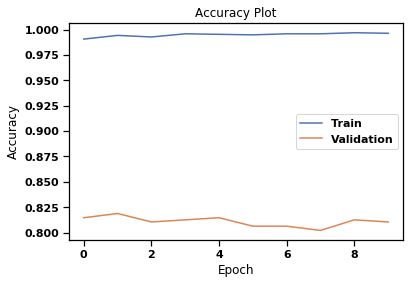

In [569]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy Plot')
# plt.ylim((0.85,1.005))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [572]:
pred=model.predict([X_val_num,X_val_text])
y_classes=pred.argmax(axis=1) # Return indices of the maximum values along the given axis.
y_classes
display_model_performance_metrics(y_val, y_classes)
model_performance = model_performance.append({'algorithm':'MLP_GloVE', 'dataset':'X_train_GLoVe_Num',
                                                      'F1_score':np.round(metrics.f1_score(y_val, y_classes,average='binary'),4),
                                                      'accuracy':np.round(metrics.accuracy_score(y_val, y_classes),4),
                                                      'execution_time_min':np.round((time.time()-s)/60,2)
                                                     }, ignore_index=True)

Model Performance metrics:
------------------------------
Accuracy: 0.8
Precision: 0.6533
Recall: 0.5904
F1 Score: 0.6203

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       434
           1       0.65      0.59      0.62       166

    accuracy                           0.80       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.79      0.80      0.80       600


Prediction Confusion Matrix:
------------------------------
          Predicted:    
                   0   1
Actual: 0        382  52
        1         68  98


### 2. LSTM Using Glove Embeddings

In [573]:
from keras.layers import Dense, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM

review_text_input= Input(shape=(max_seq_len,),name='review_text_input')

# trainable=True enables synapse weights(from GloVe) be updated in Backprpgtn
text_embed = Embedding(input_dim=review_vocab,output_dim=100,weights=[review_embedding_matrix],trainable=True)(review_text_input)
review_out_text = Flatten()(text_embed)   # 2nd Flattening Layer

# dropout = (SpatialDropout1D(0.2))(review_out_text)
lstm = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(text_embed)
final_out = Dense(no_of_levels, activation='softmax')(lstm)

model = Model(inputs=[review_text_input], outputs=final_out)
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
s=time.time()
model_history = model.fit(x = [X_train_text], y = ohe_y_train, epochs=10,validation_split=0.20)  # epoch or batch iteration = 10

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
review_text_input (InputLaye (None, 500)               0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 500, 100)          327200    
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 130       
Total params: 369,570
Trainable params: 369,570
Non-trainable params: 0
_________________________________________________________________
None
Train on 1920 samples, validate on 480 samples
Epoch 1/10
1920/1920 [==============================] - ETA: 6:58 - loss: 0.7528 - acc: 0.375 - ETA: 3:54 - loss: 0.7200 - acc: 0.500 - ETA: 2:52 - loss: 0.6914 - acc: 0.562 - ETA: 2:21 - loss: 0.690

1920/1920 [==============================] - ETA: 27s - loss: 0.2011 - acc: 0.96 - ETA: 27s - loss: 0.2032 - acc: 0.95 - ETA: 26s - loss: 0.2065 - acc: 0.92 - ETA: 26s - loss: 0.2111 - acc: 0.91 - ETA: 25s - loss: 0.2075 - acc: 0.91 - ETA: 25s - loss: 0.2076 - acc: 0.91 - ETA: 24s - loss: 0.2159 - acc: 0.90 - ETA: 24s - loss: 0.2133 - acc: 0.90 - ETA: 24s - loss: 0.2190 - acc: 0.90 - ETA: 23s - loss: 0.2165 - acc: 0.90 - ETA: 22s - loss: 0.2113 - acc: 0.90 - ETA: 22s - loss: 0.2136 - acc: 0.90 - ETA: 21s - loss: 0.2209 - acc: 0.90 - ETA: 20s - loss: 0.2320 - acc: 0.89 - ETA: 20s - loss: 0.2379 - acc: 0.89 - ETA: 19s - loss: 0.2388 - acc: 0.89 - ETA: 19s - loss: 0.2401 - acc: 0.89 - ETA: 18s - loss: 0.2468 - acc: 0.89 - ETA: 18s - loss: 0.2459 - acc: 0.88 - ETA: 17s - loss: 0.2457 - acc: 0.89 - ETA: 17s - loss: 0.2472 - acc: 0.89 - ETA: 16s - loss: 0.2439 - acc: 0.89 - ETA: 16s - loss: 0.2425 - acc: 0.89 - ETA: 15s - loss: 0.2519 - acc: 0.89 - ETA: 15s - loss: 0.2473 - acc: 0.89 - ETA: 

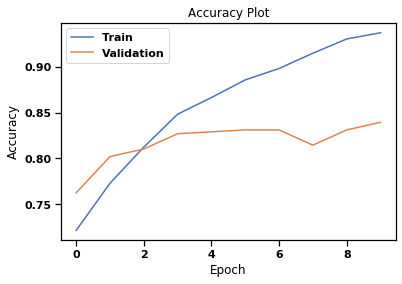

In [574]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy Plot')
# plt.ylim((0.85,1.005))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [575]:
pred=model.predict([X_val_text])
y_classes=pred.argmax(axis=1) # Return indices of the maximum values along the given axis.
y_classes
display_model_performance_metrics(y_val, y_classes)
model_performance = model_performance.append({'algorithm':'LSTM_GloVE', 'dataset':'X_train_GLoVe',
                                                      'F1_score':np.round(metrics.f1_score(y_val, y_classes,average='binary'),4),
                                                      'accuracy':np.round(metrics.accuracy_score(y_val, y_classes),4),
                                                      'execution_time_min':np.round((time.time()-s)/60,2)
                                                     }, ignore_index=True)

Model Performance metrics:
------------------------------
Accuracy: 0.8483
Precision: 0.7483
Recall: 0.6807
F1 Score: 0.7129

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       434
           1       0.75      0.68      0.71       166

    accuracy                           0.85       600
   macro avg       0.82      0.80      0.80       600
weighted avg       0.84      0.85      0.85       600


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   0    1
Actual: 0        396   38
        1         53  113


## Model Performance and Analysis

In [576]:
model_performance

,algorithm,F1_score,dataset,execution_time_min,accuracy,best_params
0,Complement_NaiveBayes,0.7574,X_train_01_cv,0.11,0.8633,{'alpha': 0.85}
1,Complement_NaiveBayes,0.7535,X_train_01_tf,0.04,0.8517,{'alpha': 0.99}
2,Complement_NaiveBayes,0.7574,X_train_02_cv,0.11,0.8633,{'alpha': 0.85}
3,Complement_NaiveBayes,0.7535,X_train_02_tf,0.03,0.8517,{'alpha': 0.99}
4,Complement_NaiveBayes,0.7418,os_X_train_0_cv,0.06,0.8433,{'alpha': 0.95}
5,Logistic_Regression,0.7329,X_train_2_cv,0.06,0.8567,"{'class_weight': {0: 0.4, 1: 0.6}, 'penalty': ..."
6,Logistic_Regression,0.6497,X_train_2_tf,0.03,0.8167,"{'class_weight': {0: 0.4, 1: 0.6}, 'penalty': ..."
7,SVM_SGD,0.6814,X_train_2_cv,0.38,0.8317,"{'alpha': 0.001, 'class_weight': {0: 0.4, 1: 0..."
8,SVM_SGD,0.5882,X_train_2_tf,0.31,0.8017,"{'alpha': 0.001, 'class_weight': {0: 0.4, 1: 0..."
9,SVM_Classifier,0.6861,X_train_2_cv,2.64,0.8383,"{'kernel': 'linear', 'C': 1}"


In [599]:
model_aggregate = pd.DataFrame(model_performance.groupby('algorithm')['F1_score','accuracy'].mean()).sort_values('F1_score', ascending=False)
model_aggregate

,F1_score,accuracy
algorithm,,
Complement_NaiveBayes,0.752720,0.854660
LSTM_GloVE,0.712900,0.848300
SVM_Classifier,0.704167,0.842767
Logistic_Regression,0.694200,0.824467
LSTM,0.683700,0.835000
Gradient_Boosting_Trees,0.664400,0.826667
MLP_2_HidLayer,0.647400,0.816700
SVM_SGD,0.632600,0.781133
MLP_GloVE,0.620300,0.800000


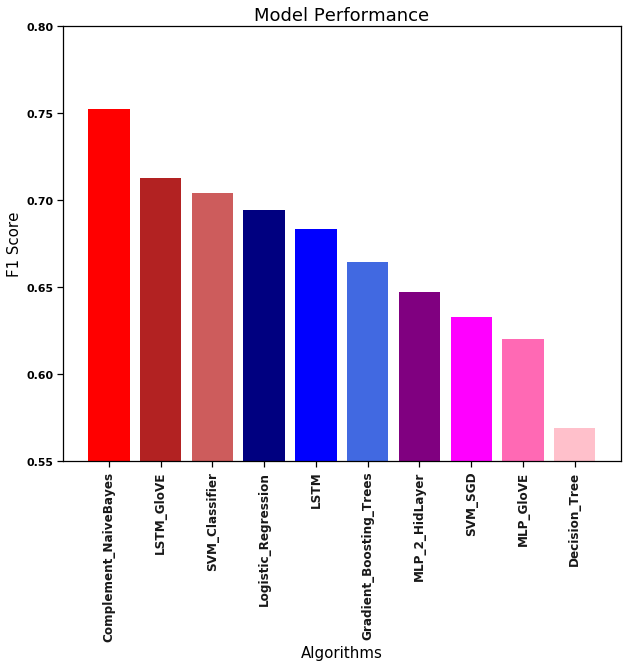

In [610]:
# Choose the height of the bars
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)
plt.figure(figsize=(10,8))

height = model_aggregate['F1_score']
 
# Choose the names of the bars
bars = list(model_aggregate.index)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height, color=['red','firebrick','indianred','navy','blue','royalblue',
                             'purple','magenta','hotpink','pink'])

xtick_location = list(range(0,len(list(model_aggregate.index))))
xtick_labels = list(model_aggregate.index)
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, horizontalalignment='center', alpha=.9)
plt.xlabel('Algorithms',fontsize=15)
plt.ylim((0.55,0.80))
plt.ylabel('F1 Score',fontsize=15)
plt.title('Model Performance', fontsize=18)
plt.show()

# # Create names on the x-axis
# plt.xticks(y_pos, bars, color='orange')
# plt.yticks(color='orange')